In [1]:
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Lasso
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [2]:
raw_train_data = pd.read_csv('train.csv')
raw_test_data = pd.read_csv('test.csv')

In [4]:
raw_train_data

,id,date,street_id,build_tech,floor,area,rooms,balcon,metro_dist,g_lift,...,kw5,kw6,kw7,kw8,kw9,kw10,kw11,kw12,kw13,price
0,0,2011-1,560,NaN,2,59,3,0,30.0,1.0,...,0,0,0,0,0,0,0,0,0,4510000
1,1,2011-1,667,NaN,10,50,2,1,25.0,NaN,...,0,0,0,0,0,0,0,0,0,13231000
2,2,2011-1,90,0.0,1,48,2,0,25.0,0.0,...,0,0,0,0,0,0,0,0,0,2008000
3,3,2011-1,94,1.0,3,62,3,1,30.0,NaN,...,0,0,0,0,0,0,0,0,0,12680000
4,4,2011-1,232,0.0,3,60,3,0,25.0,NaN,...,0,0,0,0,0,0,0,0,0,3335000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,99995,2012-3,401,0.0,5,30,1,0,30.0,NaN,...,0,0,0,0,0,0,0,0,0,1697000
99996,99996,2012-3,59,0.0,4,34,1,0,30.0,NaN,...,0,0,0,0,0,0,0,0,0,3620000
99997,99997,2012-3,253,NaN,3,52,2,0,5.0,NaN,...,0,0,0,0,0,0,0,0,0,6712000
99998,99998,2012-3,305,1.0,3,181,5,1,5.0,NaN,...,0,0,0,0,0,0,0,0,0,20835000


In [4]:
raw_train_data.describe()

,id,street_id,build_tech,floor,area,rooms,balcon,metro_dist,g_lift,n_photos,...,kw5,kw6,kw7,kw8,kw9,kw10,kw11,kw12,kw13,price
count,100000.000000,100000.000000,70265.000000,100000.000000,100000.00000,100000.000000,100000.000000,95104.000000,70008.000000,100000.000000,...,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,100000.000000,100000.000000,100000.00000,1.000000e+05
mean,49999.500000,334.479290,0.529837,5.267680,52.25343,2.118680,0.396740,22.154431,0.500986,2.470910,...,0.004360,0.001430,0.000940,0.007910,0.007890,0.00218,0.000320,0.001210,0.00021,5.138396e+06
std,28867.657797,194.004755,0.573645,3.905558,17.79250,0.829688,0.547632,8.286241,0.500003,1.944981,...,0.065887,0.037788,0.030645,0.088586,0.088475,0.04664,0.017886,0.034764,0.01449,4.187469e+06
min,0.000000,0.000000,0.000000,1.000000,29.00000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,4.480000e+05
25%,24999.750000,167.000000,0.000000,2.000000,40.00000,1.000000,0.000000,15.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,2.644000e+06
50%,49999.500000,334.000000,0.000000,4.000000,52.00000,2.000000,0.000000,25.000000,1.000000,2.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,4.090000e+06
75%,74999.250000,501.000000,1.000000,7.000000,60.00000,3.000000,1.000000,30.000000,1.000000,4.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,6.281000e+06
max,99999.000000,671.000000,2.000000,25.000000,217.00000,6.000000,2.000000,30.000000,1.000000,11.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.00000,8.054800e+07


Колонку id можно выкинуть, она неинформативная, колонки street_id преобразовать

In [5]:
raw_test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 24 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   id          100000 non-null  int64  
 1   date        100000 non-null  object 
 2   street_id   100000 non-null  int64  
 3   build_tech  69980 non-null   float64
 4   floor       100000 non-null  int64  
 5   area        100000 non-null  int64  
 6   rooms       100000 non-null  int64  
 7   balcon      100000 non-null  int64  
 8   metro_dist  94883 non-null   float64
 9   g_lift      70186 non-null   float64
 10  n_photos    100000 non-null  int64  
 11  kw1         100000 non-null  int64  
 12  kw2         100000 non-null  int64  
 13  kw3         100000 non-null  int64  
 14  kw4         100000 non-null  int64  
 15  kw5         100000 non-null  int64  
 16  kw6         100000 non-null  int64  
 17  kw7         100000 non-null  int64  
 18  kw8         100000 non-null  int64  
 19  kw9

In [6]:
raw_train_data['date'].unique(), len(raw_train_data['date'].unique())

(array(['2011-1', '2011-10', '2011-11', '2011-12', '2011-2', '2011-3',
        '2011-4', '2011-5', '2011-6', '2011-7', '2011-8', '2011-9',
        '2012-1', '2012-10', '2012-11', '2012-12', '2012-2', '2012-3'],
       dtype=object),
 18)

In [7]:
raw_train_data['street_id'].unique()

array([560, 667,  90,  94, 232, 453,  44,  74, 198, 522,  57, 452, 137,
        36, 645, 403, 336, 145, 495, 643, 523, 528, 392, 282,  12, 194,
       481, 474, 564, 442, 337,  60, 489, 390, 546, 554, 548, 110, 123,
        15, 497,   4, 412, 478, 151, 144, 306, 333, 201, 350,  53, 294,
       130,  96, 586, 473, 154, 134, 615, 175, 638, 308, 465, 477, 455,
       598, 510, 221, 395, 574, 549, 312, 177, 287, 235, 597,  41, 236,
        63, 496, 508, 319, 470,  92, 398,  47, 114, 277,   1, 545,  72,
       464, 568, 661, 553, 556, 239, 389,  18, 339, 445, 487, 301,  22,
       264, 213, 179, 423,  24, 284, 505, 565,   6,  49,  75,   9, 164,
        91, 424,  88, 178, 368, 181, 438, 499, 341, 365, 297, 521, 218,
       167, 652, 399, 224, 173, 321, 300,  73, 219, 649, 174, 599, 379,
       426, 580, 289, 135, 204, 449, 165, 592, 360, 571, 326,  31, 590,
       199, 307, 575, 316, 256, 202, 107,   5, 408, 401, 147,  52, 492,
       242, 501, 260, 302, 129, 168, 670, 623, 274, 318,  55, 66

In [8]:
raw_train_data['balcon'].unique()

array([0, 1, 2], dtype=int64)

In [9]:
raw_train_data['g_lift'].unique()

array([ 1., nan,  0.])

In [10]:
raw_train_data['build_tech'].unique()

array([nan,  0.,  1.,  2.])

Переведём date из категориального формата в порядковый и посмотрим на распределение

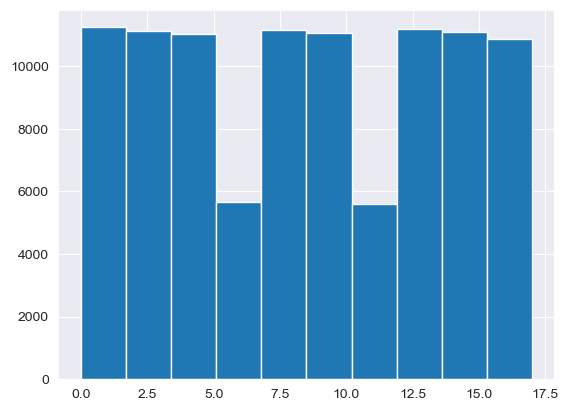

In [11]:
data_dict = dict()
for i, data in enumerate(sorted(raw_train_data['date'].unique())):
    data_dict[data] = i

date_numeric_df = pd.DataFrame([data_dict[x] for x in raw_train_data['date']], columns=['date_numeric'])
# plt.figure(figsize=(10, 7))
plt.hist(date_numeric_df, bins = 10)
plt.show()

Index([0.0, 1.0, nan, 2.0], dtype='float64', name='build_tech') [35845 31611 29735  2809]


Text(0, 0.5, 'Number of Samples')

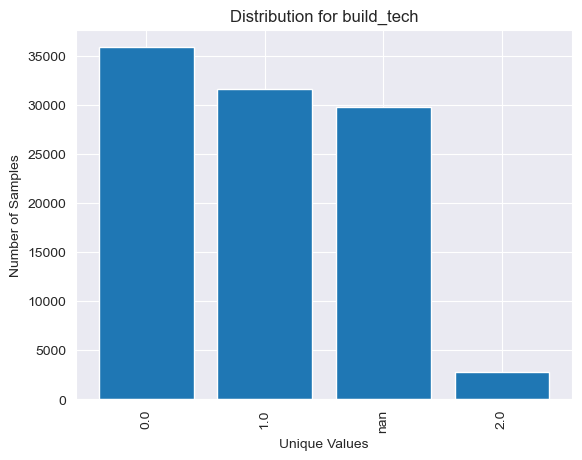

In [12]:
build_tech_count = raw_train_data["build_tech"].value_counts(dropna=False)
print(build_tech_count.index, build_tech_count.values)
plt.bar(range(len(build_tech_count.index)), build_tech_count.values)
plt.title('Distribution for build_tech')
plt.xticks(range(len(build_tech_count.index)), build_tech_count.index, rotation=90)
plt.xlabel('Unique Values')
plt.ylabel('Number of Samples')

Text(0, 0.5, 'Number of Samples')

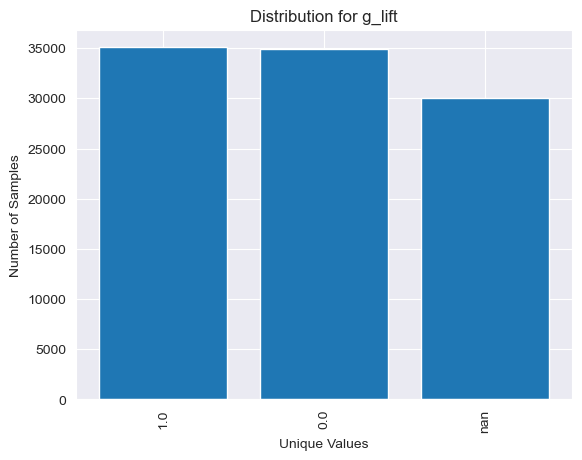

In [13]:
g_lift_count = raw_train_data["g_lift"].value_counts(dropna=False)
plt.bar(range(len(g_lift_count.index)), g_lift_count.values)
plt.title('Distribution for g_lift')
plt.xticks(range(len(g_lift_count.index)), g_lift_count.index, rotation=90)
plt.xlabel('Unique Values')
plt.ylabel('Number of Samples')

Text(0, 0.5, 'Number of Samples')

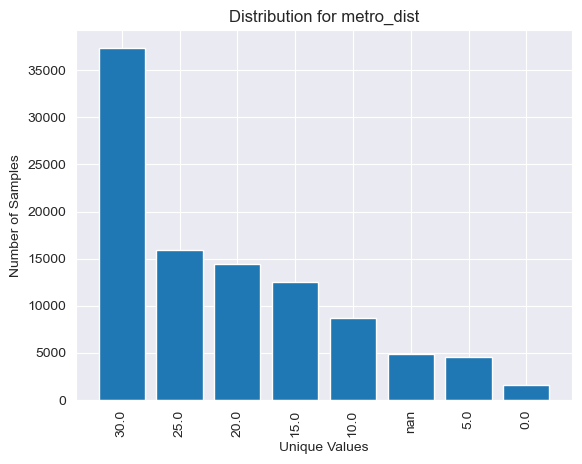

In [14]:
metro_dist_count = raw_train_data["metro_dist"].value_counts(dropna=False)
plt.bar(range(len(metro_dist_count.index)), metro_dist_count.values)
plt.title('Distribution for metro_dist')
plt.xticks(range(len(metro_dist_count.index)), metro_dist_count.index, rotation=90)
plt.xlabel('Unique Values')
plt.ylabel('Number of Samples')

In [15]:
def check_one_hot(df: pd.DataFrame, columns: list) -> bool:
    # Проверяем, что в каждой строке только одна единица
    for index, row in df[columns].iterrows():
        if row.sum() > 1:
            # pass
            # print(row)
            return False

    # Проверяем, что в каждом столбце есть хотя бы одна единица
    for column in columns:
        if df[column].sum() == 0:
            print(column)
            return False

    return True

# Использование функции
df = raw_train_data  # Ваш DataFrame
columns = ['kw1', 'kw2', 'kw3', 'kw4', 'kw5', 'kw6', 'kw7', 'kw8', 'kw9', 'kw10', 'kw11', 'kw12', 'kw13']
is_one_hot = check_one_hot(df, columns)

print(f"Признаки {'kw1 -- kw13' if is_one_hot else 'не'} являются закодированными с помощью one hot encoding.")
for column in columns:
    if df[column].sum() == 0:
        print(column)


Признаки не являются закодированными с помощью one hot encoding.


Таким образом мы не можем исключить ни один из признаков напрямую

(0.0, 36.0)

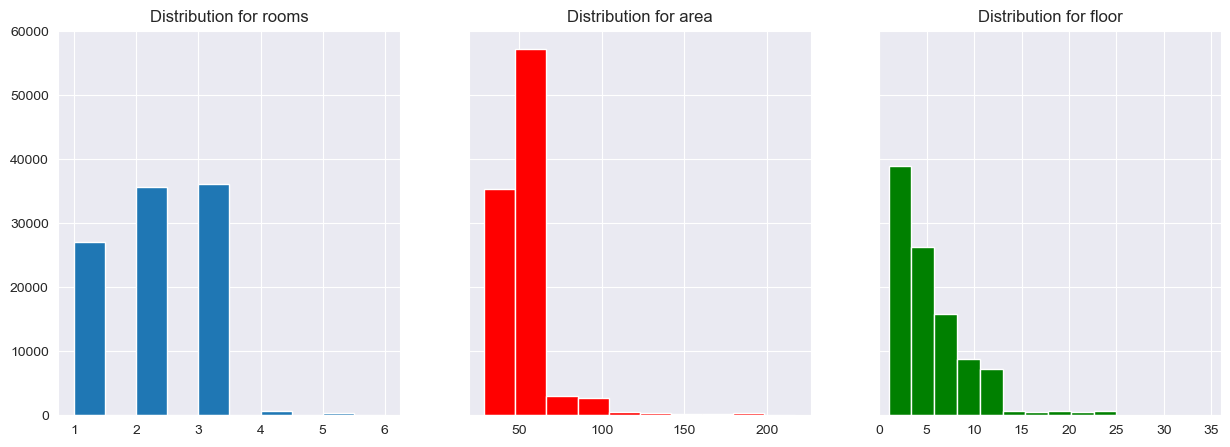

In [16]:
figure, axs = plt.subplots(1, 3, sharey='all', figsize = (15, 5))

axs[0].hist(raw_train_data['rooms'], bins = 10)
axs[0].set_title('Distribution for rooms')

axs[1].hist(raw_train_data['area'], bins = 10, color = 'red')
axs[1].set_title('Distribution for area')

axs[2].hist(raw_train_data['floor'], bins = 10, color = 'green')
axs[2].set_title('Distribution for floor')
plt.xlim([0, 36])

Text(0.5, 1.0, 'Distribution for n_photos')

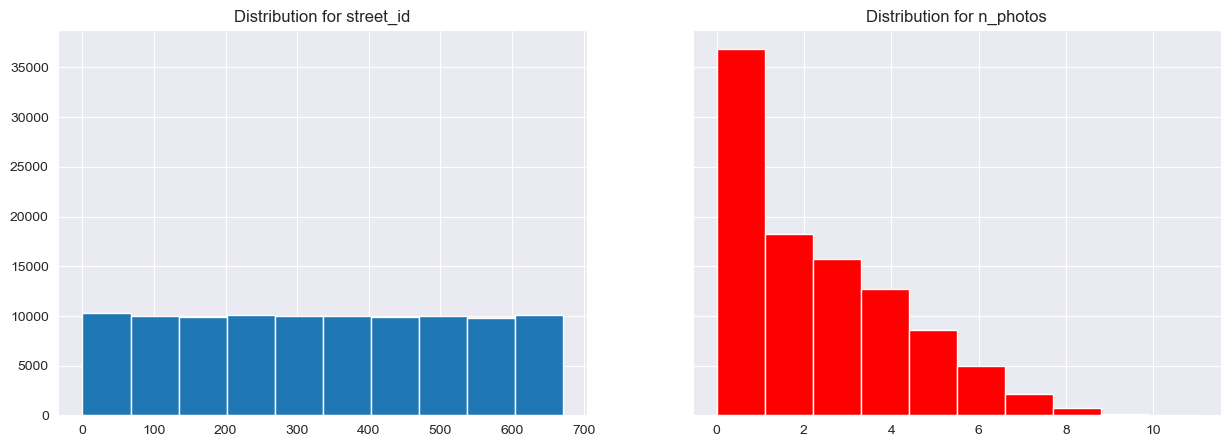

In [17]:
figure, axs = plt.subplots(1, 2, sharey='all', figsize = (15, 5))

axs[0].hist(raw_train_data['street_id'], bins = 10)
axs[0].set_title('Distribution for street_id')

axs[1].hist(raw_train_data['n_photos'], bins = 10, color = 'red')
axs[1].set_title('Distribution for n_photos')


## Посмотрим на корреляцию признаков с целевой переменной

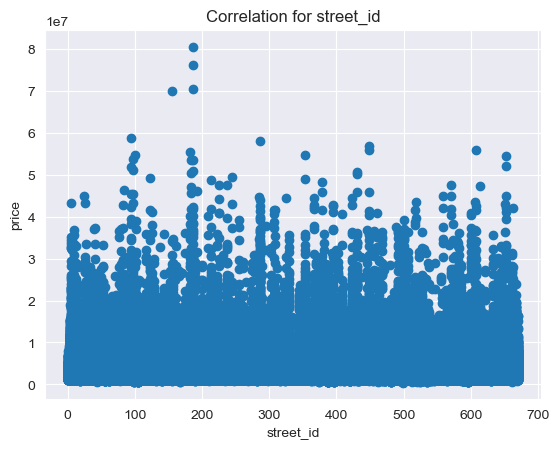

In [18]:
plt.scatter(raw_train_data['street_id'], raw_train_data['price'])
plt.title('Correlation for street_id')
plt.xlabel("street_id")
plt.ylabel("price")
plt.show()

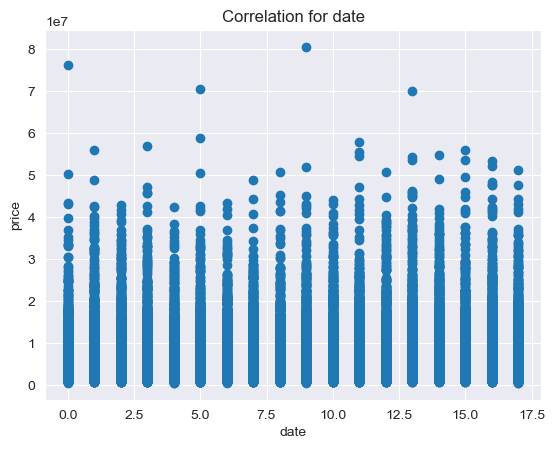

In [19]:
plt.scatter(date_numeric_df, raw_train_data['price'])
plt.title('Correlation for date')
plt.xlabel("date")
plt.ylabel("price")
plt.show()

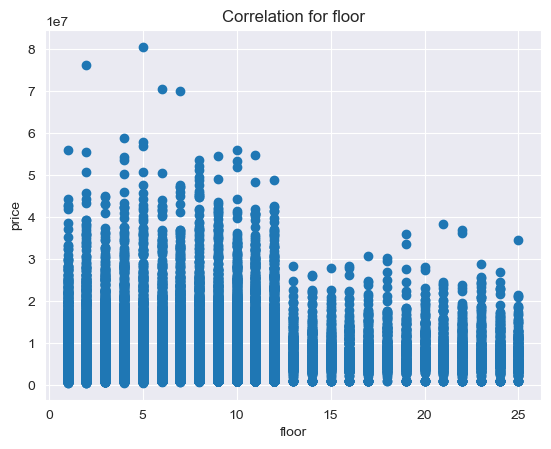

In [20]:
plt.scatter(raw_train_data['floor'], raw_train_data['price'])
plt.title('Correlation for floor')
plt.xlabel("floor")
plt.ylabel("price")
plt.show()

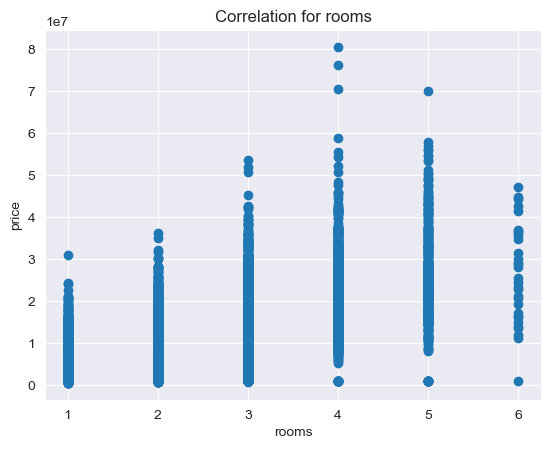

In [21]:
plt.scatter(raw_train_data['rooms'], raw_train_data['price'])
plt.title('Correlation for rooms')
plt.xlabel("rooms")
plt.ylabel("price")
plt.show()

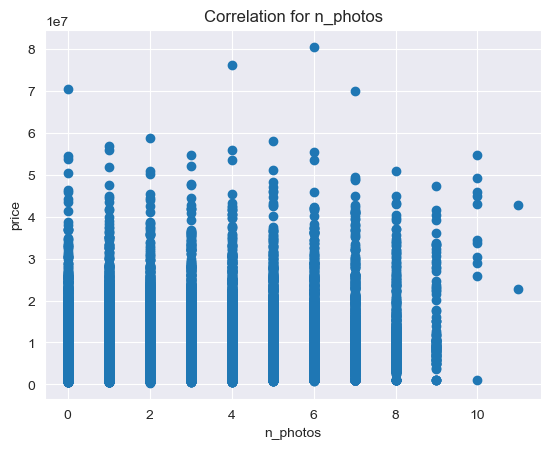

In [22]:
plt.scatter(raw_train_data['n_photos'], raw_train_data['price'])
plt.title('Correlation for n_photos')
plt.xlabel("n_photos")
plt.ylabel("price")
plt.show()

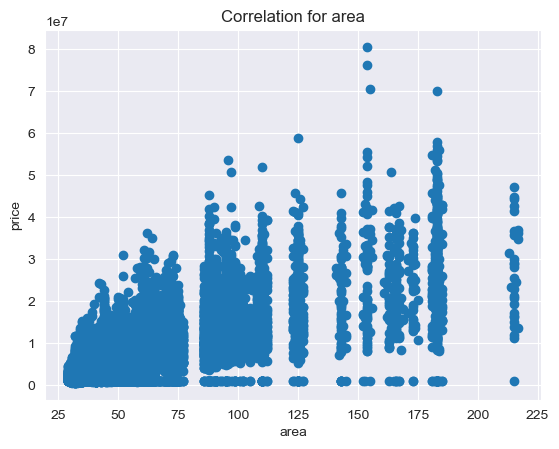

In [23]:
plt.scatter(raw_train_data['area'], raw_train_data['price'])
plt.title('Correlation for area')
plt.xlabel("area")
plt.ylabel("price")
plt.show()

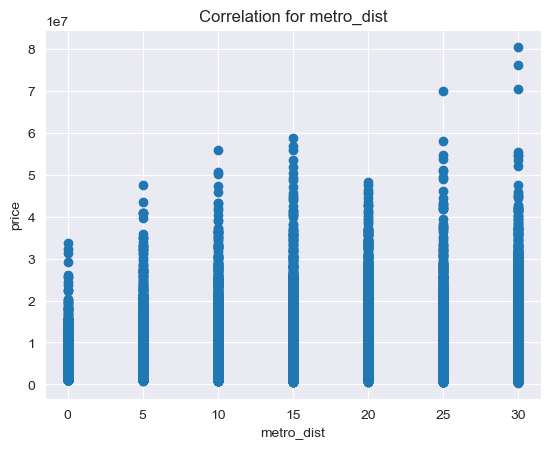

In [24]:
plt.scatter(raw_train_data['metro_dist'], raw_train_data['price'])
plt.title('Correlation for metro_dist')
plt.xlabel("metro_dist")
plt.ylabel("price")
plt.show()

In [25]:
raw_train_data.columns

Index(['id', 'date', 'street_id', 'build_tech', 'floor', 'area', 'rooms',
       'balcon', 'metro_dist', 'g_lift', 'n_photos', 'kw1', 'kw2', 'kw3',
       'kw4', 'kw5', 'kw6', 'kw7', 'kw8', 'kw9', 'kw10', 'kw11', 'kw12',
       'kw13', 'price'],
      dtype='object')

<AxesSubplot: >

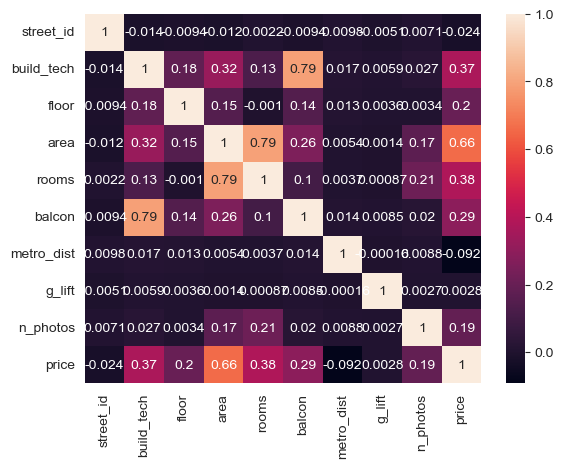

In [26]:
sns.heatmap(raw_train_data[['street_id', 'build_tech', 'floor', 'area', 'rooms',
                            'balcon', 'metro_dist', 'g_lift', 'n_photos', 'price']].corr(numeric_only=True), annot = True)

<AxesSubplot: >

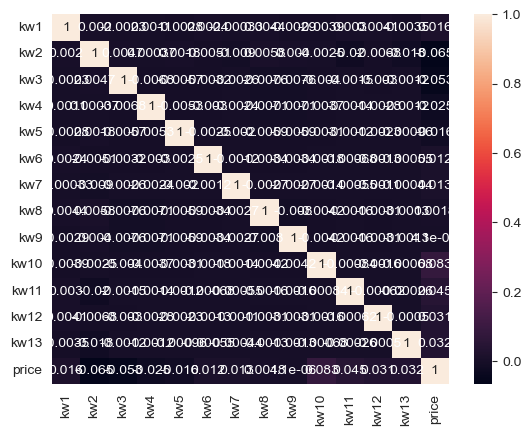

In [27]:
sns.heatmap(raw_train_data[['kw1', 'kw2', 'kw3',
                            'kw4', 'kw5', 'kw6', 'kw7', 'kw8', 'kw9', 'kw10', 'kw11', 'kw12',
                            'kw13', 'price']].corr(numeric_only=True), annot = True)

## Посмотрим на распределение целевой переменной

<AxesSubplot: >

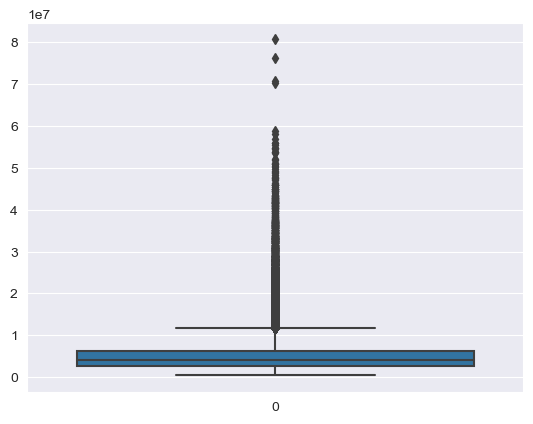

In [28]:
sns.boxplot(raw_train_data['price'])

Text(0.5, 1.0, 'Distribution for price')

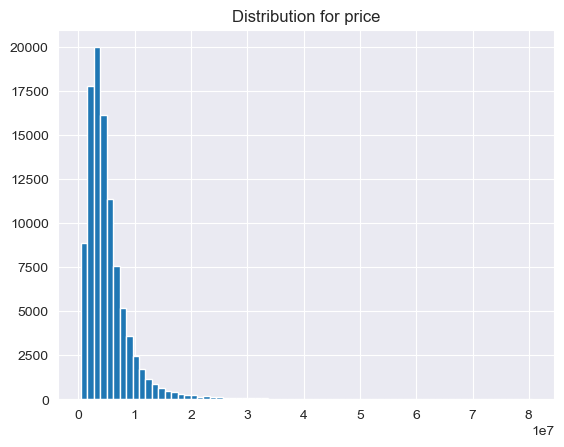

In [29]:
plt.hist(raw_train_data['price'], bins = 70)
plt.title('Distribution for price')

## Имеющиеся на данный момент идеи:
### 1) Взять только признаки build_tech, floor, area, rooms, n_photos
### 2) Убрать хвост по цене на уровне 1e7
### 3) Заполнить пропуски с помощью других алгоритмов ML
### 4) Закодировать с помощью Hashing trick street_id

## Для baseline возьмем линейную регрессию преобразовав data в порядковый признак, заполнив пропуски самым часто встречающимся значением.

In [30]:
df_baseline = raw_train_data.copy()
df_baseline['date'] = date_numeric_df['date_numeric']

df_baseline['build_tech'].fillna(0, inplace=True)
df_baseline['g_lift'].fillna(1, inplace=True)
df_baseline['metro_dist'].fillna(30, inplace=True)

df_baseline.drop(['id'], axis=1, inplace=True)

df_baseline.describe()

train_df_baseline, test_df_baseline = train_test_split(df_baseline, test_size=0.2, random_state=42, shuffle=True)

baseline_model = LinearRegression()
baseline_model.fit(train_df_baseline.drop(['price'], axis=1), train_df_baseline['price'])

LinearRegression()

In [31]:
baseline_preds = baseline_model.predict(test_df_baseline.drop(['price'], axis=1))
baseline_MAE = mean_absolute_error(test_df_baseline['price'], baseline_preds)
baseline_score = 1.0 / (1. + baseline_MAE)
baseline_score

5.442984578293909e-07

## Получили в целом неплохой результат, от него и будем отталкиваться

#### Посмотрим на то, как ведут себя признаки при регуляризации, и проанализируем их полезность

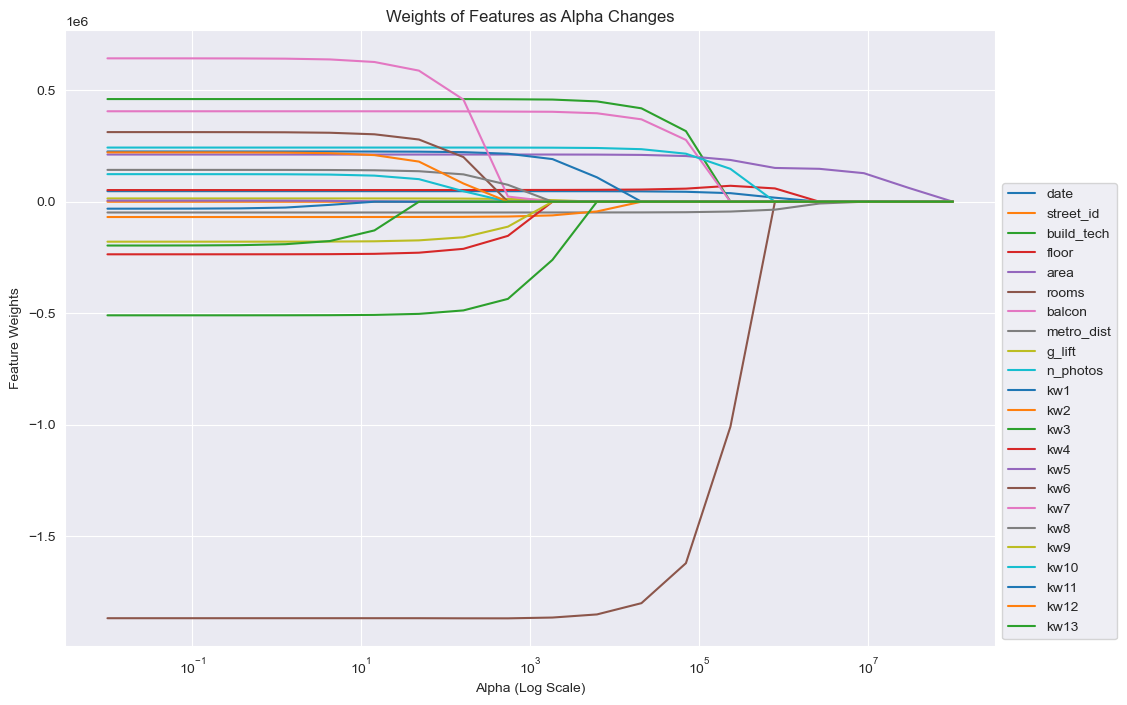

In [32]:

# Обучаем модель Lasso
alphas = np.logspace(-2, 8, 20)  # различные значения параметра регуляризации
weights = []
features = train_df_baseline.drop(['price'], axis=1).columns
for alpha in alphas:
    lasso = Lasso(alpha=alpha)
    lasso.fit(train_df_baseline.drop(['price'], axis=1), train_df_baseline['price'])
    weights.append(lasso.coef_)

# Строим график
plt.figure(figsize=(12, 8))
for i in range(len(features)):
    plt.plot(alphas, [weight[i] for weight in weights], label=f'{features[i]}')

plt.xscale('log')
plt.xlabel('Alpha (Log Scale)')
plt.ylabel('Feature Weights')
plt.title('Weights of Features as Alpha Changes')
plt.legend(bbox_to_anchor=(1,0), loc="lower left")
plt.show()

## Очень красиво, но непонятно, попробую построить графики по отдельности

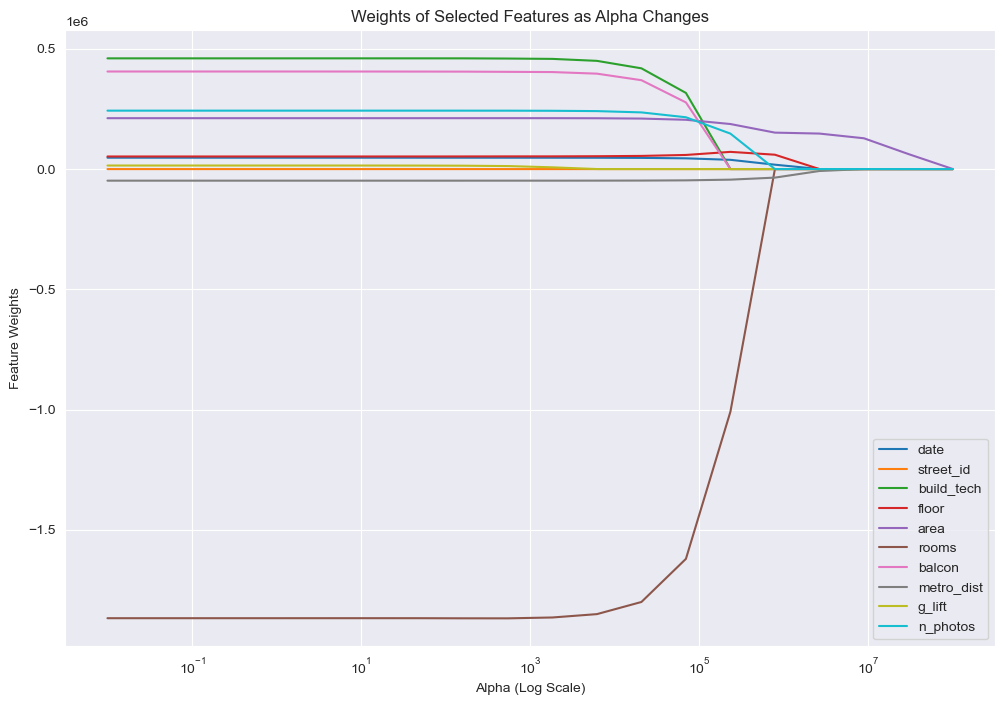

In [33]:
alphas = np.logspace(-2, 8, 20)  # различные значения параметра регуляризации
weights = []
features = train_df_baseline.drop(['price'], axis=1).columns
for alpha in alphas:
    lasso = Lasso(alpha=alpha)
    lasso.fit(train_df_baseline.drop(['price'], axis=1), train_df_baseline['price'])
    weights.append(lasso.coef_)

# Выберите признаки, для которых вы хотите построить графики
selected_features = ['date', 'street_id', 'build_tech', 'floor', 'area', 'rooms',
                     'balcon', 'metro_dist', 'g_lift', 'n_photos']  # замените на имена ваших признаков

# Строим график
plt.figure(figsize=(12, 8))
for feature in selected_features:
    i = list(features).index(feature)
    plt.plot(alphas, [weight[i] for weight in weights], label=f'{feature}')

plt.xscale('log')
plt.xlabel('Alpha (Log Scale)')
plt.ylabel('Feature Weights')
plt.title('Weights of Selected Features as Alpha Changes')
plt.legend(bbox_to_anchor=(1,0), loc="lower right")
plt.show()

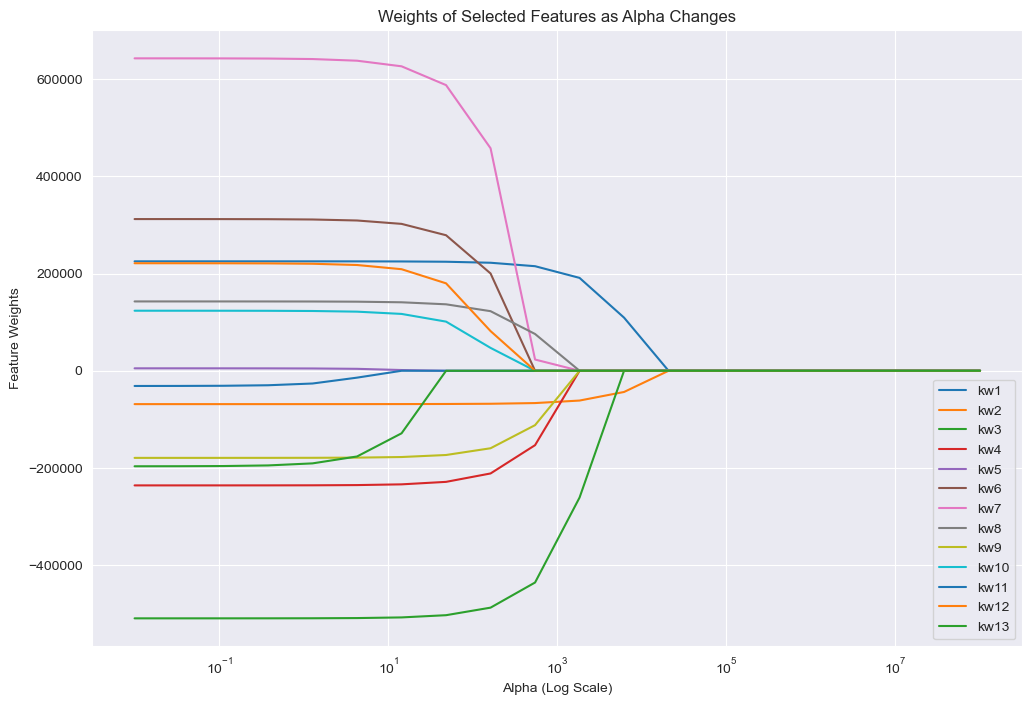

In [34]:
alphas = np.logspace(-2, 8, 20)  # различные значения параметра регуляризации
weights = []
features = train_df_baseline.drop(['price'], axis=1).columns
for alpha in alphas:
    lasso = Lasso(alpha=alpha)
    lasso.fit(train_df_baseline.drop(['price'], axis=1), train_df_baseline['price'])
    weights.append(lasso.coef_)

# Выберите признаки, для которых вы хотите построить графики
selected_features = ['kw1', 'kw2', 'kw3',
                     'kw4', 'kw5', 'kw6', 'kw7', 'kw8', 'kw9', 'kw10', 'kw11', 'kw12',
                     'kw13']  # замените на имена ваших признаков

# Строим график
plt.figure(figsize=(12, 8))
for feature in selected_features:
    i = list(features).index(feature)
    plt.plot(alphas, [weight[i] for weight in weights], label=f'{feature}')

plt.xscale('log')
plt.xlabel('Alpha (Log Scale)')
plt.ylabel('Feature Weights')
plt.title('Weights of Selected Features as Alpha Changes')
plt.legend(bbox_to_anchor=(1,0), loc="lower right")
plt.show()

#### Из этих графиков видно, что именные фичи имеют большую "живучесть" по сравнению с kw1-kw13, за исключением street_id и g_lift

In [35]:
raw_train_data.columns

Index(['id', 'date', 'street_id', 'build_tech', 'floor', 'area', 'rooms',
       'balcon', 'metro_dist', 'g_lift', 'n_photos', 'kw1', 'kw2', 'kw3',
       'kw4', 'kw5', 'kw6', 'kw7', 'kw8', 'kw9', 'kw10', 'kw11', 'kw12',
       'kw13', 'price'],
      dtype='object')

## Попробуем разобраться с признаками build_tech, g_lift и metro_dist.
### Предположим, что build_tech это материал изготовления дома и имеет порядковое значение (так как заметна корреляция с ценой см. HitMap)
### Предположим также, что g_lift -- это бинарный признак, обозначающий наличие или отсутствие лифта в доме
### 

In [36]:


# предположим, что df - это ваш датафрейм
df = raw_train_data.copy()
df['date'] = date_numeric_df['date_numeric']

# разделяем датафрейм на две части: где 'g_lift' не равно NaN и где 'g_lift' равно NaN
df_notna = df[df['g_lift'].notna()]
df_na = df[df['g_lift'].isna()]

# определяем признаки и целевую переменную, исключая столбцы 'id', 'build_tech', 'metro_dist' и 'g_lift'
X = df_notna.drop(columns=['id', 'build_tech', 'metro_dist', 'g_lift'])
y = df_notna['g_lift']

# стандартизируем данные
scaler = StandardScaler()
X = scaler.fit_transform(X)

# обучаем модель
model = LogisticRegression()
model.fit(X, y)

# заполняем пропущенные значения в 'g_lift', исключая столбцы 'id', 'build_tech', 'metro_dist' и 'g_lift'
df_na.loc[:, 'g_lift'] = model.predict(scaler.transform(df_na.drop(columns=['id', 'build_tech', 'metro_dist', 'g_lift'])))

# объединяем два датафрейма обратно
df_filled_g_lift = pd.concat([df_notna, df_na])

# сортируем итоговый датафрейм по столбцу 'id'
df_filled_g_lift = df_filled_g_lift.sort_values(by='id')

# проверяем, что пропущенных значений нет
assert df_filled_g_lift['g_lift'].isna().sum() == 0


In [37]:
df_filled_g_lift

,id,date,street_id,build_tech,floor,area,rooms,balcon,metro_dist,g_lift,...,kw5,kw6,kw7,kw8,kw9,kw10,kw11,kw12,kw13,price
0,0,0,560,NaN,2,59,3,0,30.0,1.0,...,0,0,0,0,0,0,0,0,0,4510000
1,1,0,667,NaN,10,50,2,1,25.0,1.0,...,0,0,0,0,0,0,0,0,0,13231000
2,2,0,90,0.0,1,48,2,0,25.0,0.0,...,0,0,0,0,0,0,0,0,0,2008000
3,3,0,94,1.0,3,62,3,1,30.0,1.0,...,0,0,0,0,0,0,0,0,0,12680000
4,4,0,232,0.0,3,60,3,0,25.0,1.0,...,0,0,0,0,0,0,0,0,0,3335000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,99995,17,401,0.0,5,30,1,0,30.0,0.0,...,0,0,0,0,0,0,0,0,0,1697000
99996,99996,17,59,0.0,4,34,1,0,30.0,0.0,...,0,0,0,0,0,0,0,0,0,3620000
99997,99997,17,253,NaN,3,52,2,0,5.0,0.0,...,0,0,0,0,0,0,0,0,0,6712000
99998,99998,17,305,1.0,3,181,5,1,5.0,0.0,...,0,0,0,0,0,0,0,0,0,20835000


In [38]:
# import pandas as pd
# from sklearn.linear_model import LogisticRegression
# from sklearn.preprocessing import StandardScaler
# 
# # предположим, что df - это ваш датафрейм
# df = raw_train_data.drop(columns=['id'])
# df['date'] = date_numeric_df['date_numeric']
# 
# # разделяем датафрейм на две части: где 'g_lift' не равно NaN и где 'g_lift' равно NaN
# df_notna = df[df['g_lift'].notna()]
# df_na = df[df['g_lift'].isna()]
# 
# # определяем признаки и целевую переменную, исключая столбцы 'build_tech' и 'metro_dist'
# X = df_notna.drop(columns=['build_tech', 'metro_dist', 'g_lift'])
# y = df_notna['g_lift']
# 
# # стандартизируем данные
# scaler = StandardScaler()
# X = scaler.fit_transform(X)
# 
# # обучаем модель
# model = LogisticRegression()
# model.fit(X, y)
# 
# # заполняем пропущенные значения в 'g_lift', исключая столбцы 'build_tech' и 'metro_dist'
# df_na['g_lift'] = model.predict(scaler.transform(df_na.drop(columns=['build_tech', 'metro_dist', 'g_lift'])))
# 
# # объединяем два датафрейма обратно
# df_filled_g_lift = pd.concat([df_notna, df_na])
# 
# # проверяем, что пропущенных значений нет
# assert df_filled_g_lift['g_lift'].isna().sum() == 0


In [39]:
df = df_filled_g_lift
# разделяем датафрейм на две части: где 'g_lift' не равно NaN и где 'g_lift' равно NaN
df_notna = df[df['build_tech'].notna()]
df_na = df[df['build_tech'].isna()]

# определяем признаки и целевую переменную, исключая столбцы 'id', 'build_tech', 'metro_dist' и 'g_lift'
X = df_notna.drop(columns=['id', 'build_tech', 'metro_dist'])
y = df_notna['build_tech']

# стандартизируем данные
scaler = StandardScaler()
X = scaler.fit_transform(X)

# обучаем модель
model = LogisticRegression()
model.fit(X, y)

# заполняем пропущенные значения в 'g_lift', исключая столбцы 'id', 'build_tech', 'metro_dist' и 'g_lift'
df_na.loc[:, 'build_tech'] = model.predict(scaler.transform(df_na.drop(columns=['id', 'build_tech', 'metro_dist'])))

# объединяем два датафрейма обратно
df_filled_build_tech = pd.concat([df_notna, df_na])

# сортируем итоговый датафрейм по столбцу 'id'
df_filled_build_tech = df_filled_build_tech.sort_values(by='id')

# проверяем, что пропущенных значений нет
assert df_filled_build_tech['build_tech'].isna().sum() == 0

In [40]:
df = df_filled_build_tech
# разделяем датафрейм на две части: где 'g_lift' не равно NaN и где 'g_lift' равно NaN
df_notna = df[df['metro_dist'].notna()]
df_na = df[df['metro_dist'].isna()]

# определяем признаки и целевую переменную, исключая столбцы 'id', 'build_tech', 'metro_dist' и 'g_lift'
X = df_notna.drop(columns=['id', 'metro_dist'])
y = df_notna['metro_dist']

# стандартизируем данные
scaler = StandardScaler()
X = scaler.fit_transform(X)

# обучаем модель
model = LogisticRegression()
model.fit(X, y)

# заполняем пропущенные значения в 'g_lift', исключая столбцы 'id', 'build_tech', 'metro_dist' и 'g_lift'
df_na.loc[:, 'metro_dist'] = model.predict(scaler.transform(df_na.drop(columns=['id', 'metro_dist'])))

# объединяем два датафрейма обратно
df_filled_metro_dist = pd.concat([df_notna, df_na])

# сортируем итоговый датафрейм по столбцу 'id'
df_filled_metro_dist = df_filled_metro_dist.sort_values(by='id')

# проверяем, что пропущенных значений нет
assert df_filled_metro_dist['metro_dist'].isna().sum() == 0

#### Посмотрим на распределения признаков после заполнения пропусков

Text(0.5, 1.0, 'Distribution for metro_dist')

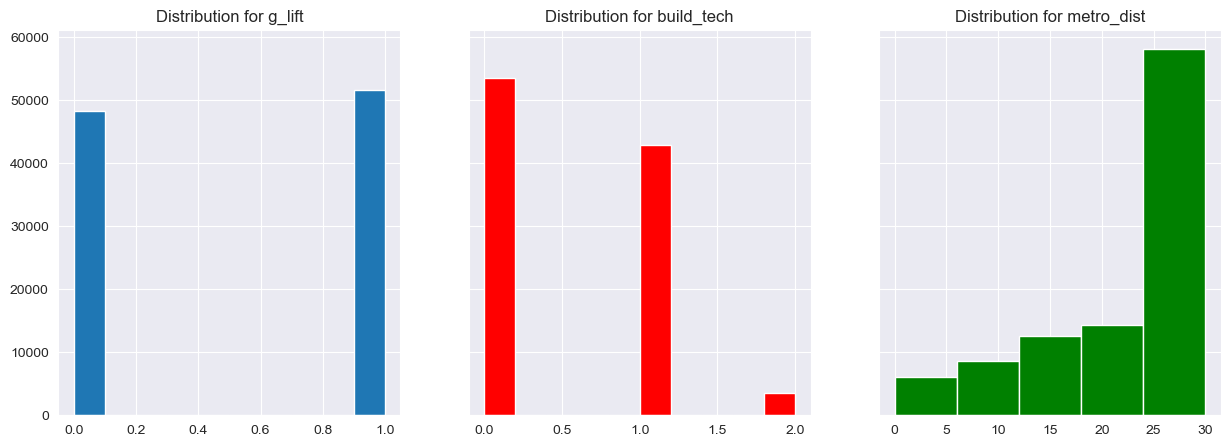

In [41]:
figure, axs = plt.subplots(1, 3, sharey='all', figsize = (15, 5))

axs[0].hist(df_filled_metro_dist['g_lift'], bins = 10)
axs[0].set_title('Distribution for g_lift')

axs[1].hist(df_filled_metro_dist['build_tech'], bins = 10, color = 'red')
axs[1].set_title('Distribution for build_tech')

axs[2].hist(df_filled_metro_dist['metro_dist'], bins = 5, color = 'green')
axs[2].set_title('Distribution for metro_dist')

### Как можно заметить распределение признаков не изменилось -- это хорошо

In [42]:
df_filled_metro_dist

,id,date,street_id,build_tech,floor,area,rooms,balcon,metro_dist,g_lift,...,kw5,kw6,kw7,kw8,kw9,kw10,kw11,kw12,kw13,price
0,0,0,560,0.0,2,59,3,0,30.0,1.0,...,0,0,0,0,0,0,0,0,0,4510000
1,1,0,667,1.0,10,50,2,1,25.0,1.0,...,0,0,0,0,0,0,0,0,0,13231000
2,2,0,90,0.0,1,48,2,0,25.0,0.0,...,0,0,0,0,0,0,0,0,0,2008000
3,3,0,94,1.0,3,62,3,1,30.0,1.0,...,0,0,0,0,0,0,0,0,0,12680000
4,4,0,232,0.0,3,60,3,0,25.0,1.0,...,0,0,0,0,0,0,0,0,0,3335000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,99995,17,401,0.0,5,30,1,0,30.0,0.0,...,0,0,0,0,0,0,0,0,0,1697000
99996,99996,17,59,0.0,4,34,1,0,30.0,0.0,...,0,0,0,0,0,0,0,0,0,3620000
99997,99997,17,253,0.0,3,52,2,0,5.0,0.0,...,0,0,0,0,0,0,0,0,0,6712000
99998,99998,17,305,1.0,3,181,5,1,5.0,0.0,...,0,0,0,0,0,0,0,0,0,20835000


### В этот момент мне пришла идея посмотреть на квадрат распределения date и street_id

Text(0.5, 1.0, 'Distribution for date^2')

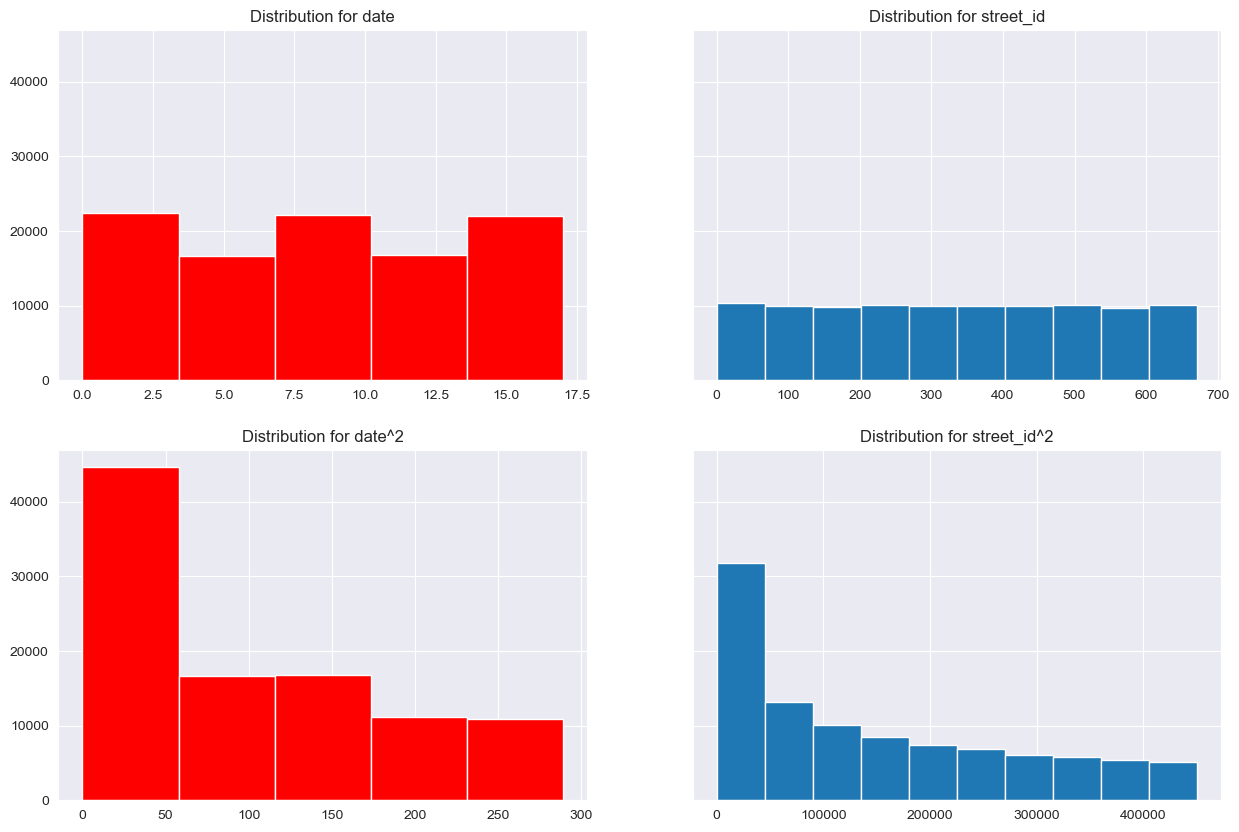

In [43]:
figure, axs = plt.subplots(2, 2, sharey='all', figsize=(15, 10))

axs[0][1].hist(df_filled_metro_dist['street_id'], bins=10)
axs[0][1].set_title('Distribution for street_id')

axs[0][0].hist(df_filled_metro_dist['date'], bins=5, color='red')
axs[0][0].set_title('Distribution for date')

axs[1][1].hist(df_filled_metro_dist['street_id']**2, bins=10)
axs[1][1].set_title('Distribution for street_id^2')

axs[1][0].hist(df_filled_metro_dist['date']**2, bins=5, color='red')
axs[1][0].set_title('Distribution for date^2')

### Кажется, что это можно использовать, добавим новые квадратичные признаки в датасет и посмотрим корреляцию

In [44]:
squared_street = pd.DataFrame(df_filled_metro_dist['street_id']**2)
squared_street.rename(columns={'street_id': 'squared_street_id'}, inplace=True)
squared_date = pd.DataFrame(df_filled_metro_dist['date']**2)
squared_date.rename(columns={'date': 'squared_date'}, inplace=True)

# squared_date. = ['squared_date']

sqr_df = pd.concat([df_filled_metro_dist, squared_street, squared_date], axis=1)
sqr_df

,id,date,street_id,build_tech,floor,area,rooms,balcon,metro_dist,g_lift,...,kw7,kw8,kw9,kw10,kw11,kw12,kw13,price,squared_street_id,squared_date
0,0,0,560,0.0,2,59,3,0,30.0,1.0,...,0,0,0,0,0,0,0,4510000,313600,0
1,1,0,667,1.0,10,50,2,1,25.0,1.0,...,0,0,0,0,0,0,0,13231000,444889,0
2,2,0,90,0.0,1,48,2,0,25.0,0.0,...,0,0,0,0,0,0,0,2008000,8100,0
3,3,0,94,1.0,3,62,3,1,30.0,1.0,...,0,0,0,0,0,0,0,12680000,8836,0
4,4,0,232,0.0,3,60,3,0,25.0,1.0,...,0,0,0,0,0,0,0,3335000,53824,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,99995,17,401,0.0,5,30,1,0,30.0,0.0,...,0,0,0,0,0,0,0,1697000,160801,289
99996,99996,17,59,0.0,4,34,1,0,30.0,0.0,...,0,0,0,0,0,0,0,3620000,3481,289
99997,99997,17,253,0.0,3,52,2,0,5.0,0.0,...,0,0,0,0,0,0,0,6712000,64009,289
99998,99998,17,305,1.0,3,181,5,1,5.0,0.0,...,0,0,0,0,0,0,0,20835000,93025,289


In [45]:
sqr_df.describe()

,id,date,street_id,build_tech,floor,area,rooms,balcon,metro_dist,g_lift,...,kw7,kw8,kw9,kw10,kw11,kw12,kw13,price,squared_street_id,squared_date
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,...,100000.000000,100000.000000,100000.000000,100000.00000,100000.000000,100000.000000,100000.00000,1.000000e+05,100000.00000,100000.000000
mean,49999.500000,8.469850,334.479290,0.500770,5.267680,52.25343,2.118680,0.396740,22.529900,0.516370,...,0.000940,0.007910,0.007890,0.00218,0.000320,0.001210,0.00021,5.138396e+06,149513.86391,98.572790
std,28867.657797,5.180222,194.004755,0.567171,3.905558,17.79250,0.829688,0.547632,8.256288,0.499734,...,0.030645,0.088586,0.088475,0.04664,0.017886,0.034764,0.01449,4.187469e+06,134313.45469,90.982222
min,0.000000,0.000000,0.000000,0.000000,1.000000,29.00000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,4.480000e+05,0.00000,0.000000
25%,24999.750000,4.000000,167.000000,0.000000,2.000000,40.00000,1.000000,0.000000,15.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,2.644000e+06,27889.00000,16.000000
50%,49999.500000,8.000000,334.000000,0.000000,4.000000,52.00000,2.000000,0.000000,25.000000,1.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,4.090000e+06,111556.00000,64.000000
75%,74999.250000,13.000000,501.000000,1.000000,7.000000,60.00000,3.000000,1.000000,30.000000,1.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,6.281000e+06,251001.00000,169.000000
max,99999.000000,17.000000,671.000000,2.000000,25.000000,217.00000,6.000000,2.000000,30.000000,1.000000,...,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.00000,8.054800e+07,450241.00000,289.000000


<AxesSubplot: >

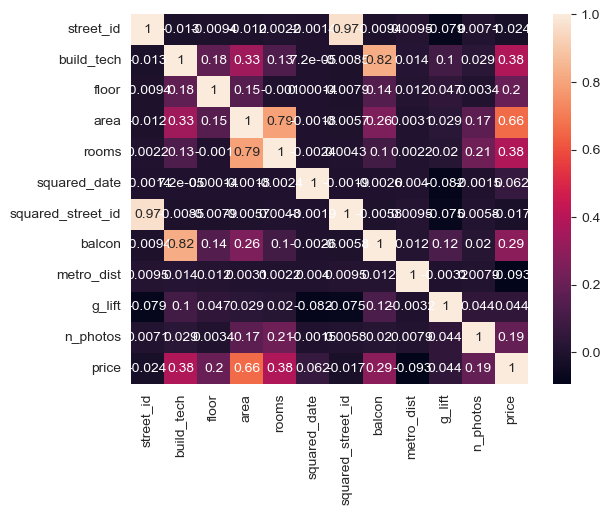

In [46]:
sns.heatmap(sqr_df[['street_id', 'build_tech', 'floor', 'area', 'rooms', "squared_date", "squared_street_id",
                            'balcon', 'metro_dist', 'g_lift', 'n_photos', 'price']].corr(numeric_only=True), annot = True)

### Квадратичные признаки не показывают хорошей корреляции с целевой переменной. Пока что оставлю и в датасете
##### Но зато подросла корреляция признаков build_tech, g_lift и metro_dist что говорит о том, что заполнение пропусков получилось хорошее.

#### Теперь применим стандартизацию: StandardScaler() к date, street_id, squared_street_id, squared_date для того чтобы постараться привести распределение к нормальному
#### MinMaxScaler() к floor, area, n_photos, metro_dist, build_tech для того чтобы максимально сохранить исходное распределение

In [47]:
st_scaler = StandardScaler()
min_max_scaler = MinMaxScaler()
scaled_df = sqr_df.copy()
scaled_df[['date', 'street_id', 'squared_street_id', 'squared_date']] = st_scaler.fit_transform(scaled_df[['date', 'street_id', 'squared_street_id', 'squared_date']])
scaled_df[['rooms','floor', 'area', 'n_photos', 'metro_dist', 'build_tech']] = min_max_scaler.fit_transform(scaled_df[['rooms','floor', 'area', 'n_photos', 'metro_dist', 'build_tech']])

scaled_df.describe()

,id,date,street_id,build_tech,floor,area,rooms,balcon,metro_dist,g_lift,...,kw7,kw8,kw9,kw10,kw11,kw12,kw13,price,squared_street_id,squared_date
count,100000.000000,1.000000e+05,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,...,100000.000000,100000.000000,100000.000000,100000.00000,100000.000000,100000.000000,100000.00000,1.000000e+05,1.000000e+05,1.000000e+05
mean,49999.500000,2.273737e-17,4.263256e-17,0.250385,0.177820,0.123688,0.223736,0.396740,0.750997,0.516370,...,0.000940,0.007910,0.007890,0.00218,0.000320,0.001210,0.00021,5.138396e+06,1.182343e-16,-1.364242e-16
std,28867.657797,1.000005e+00,1.000005e+00,0.283585,0.162732,0.094641,0.165938,0.547632,0.275210,0.499734,...,0.030645,0.088586,0.088475,0.04664,0.017886,0.034764,0.01449,4.187469e+06,1.000005e+00,1.000005e+00
min,0.000000,-1.635044e+00,-1.724086e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,4.480000e+05,-1.113177e+00,-1.083435e+00
25%,24999.750000,-8.628728e-01,-8.632785e-01,0.000000,0.041667,0.058511,0.000000,0.000000,0.500000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,2.644000e+06,-9.055345e-01,-9.075751e-01
50%,49999.500000,-9.070120e-02,-2.470519e-03,0.000000,0.125000,0.122340,0.200000,0.000000,0.833333,1.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,4.090000e+06,-2.826080e-01,-3.799969e-01
75%,74999.250000,8.745132e-01,8.583374e-01,0.500000,0.250000,0.164894,0.400000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,6.281000e+06,7.556030e-01,7.740805e-01
max,99999.000000,1.646685e+00,1.734609e+00,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.00000,8.054800e+07,2.239006e+00,2.093026e+00


Text(0.5, 1.0, 'Distribution for squared_date^2')

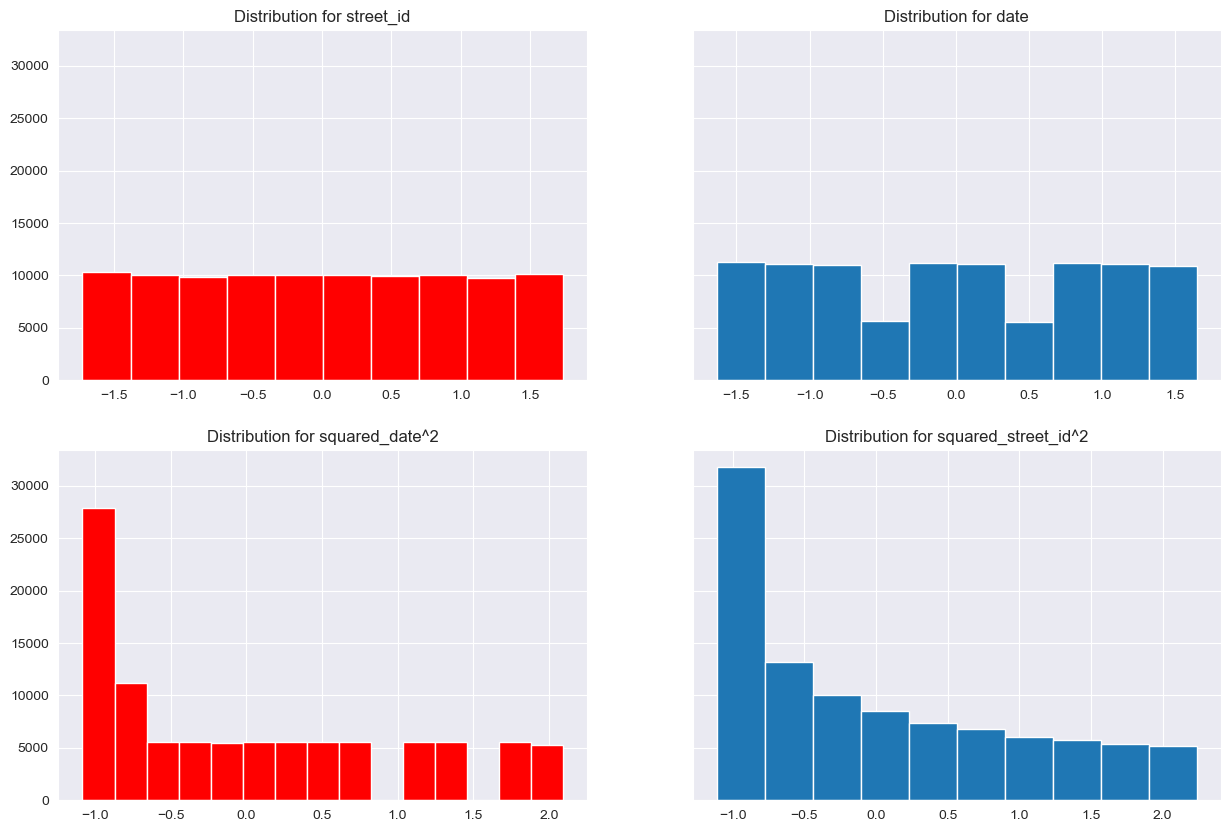

In [48]:
figure, axs = plt.subplots(2, 2, sharey='all', figsize=(15, 10))

axs[0][1].hist(scaled_df['date'], bins=10)
axs[0][1].set_title('Distribution for date')

axs[0][0].hist(scaled_df['street_id'], bins=10, color='red')
axs[0][0].set_title('Distribution for street_id')

axs[1][1].hist(scaled_df['squared_street_id'], bins=10)
axs[1][1].set_title('Distribution for squared_street_id^2')

axs[1][0].hist(scaled_df['squared_date'], bins=15, color='red')
axs[1][0].set_title('Distribution for squared_date^2')

Text(0.5, 1.0, 'Distribution for metro_dist')

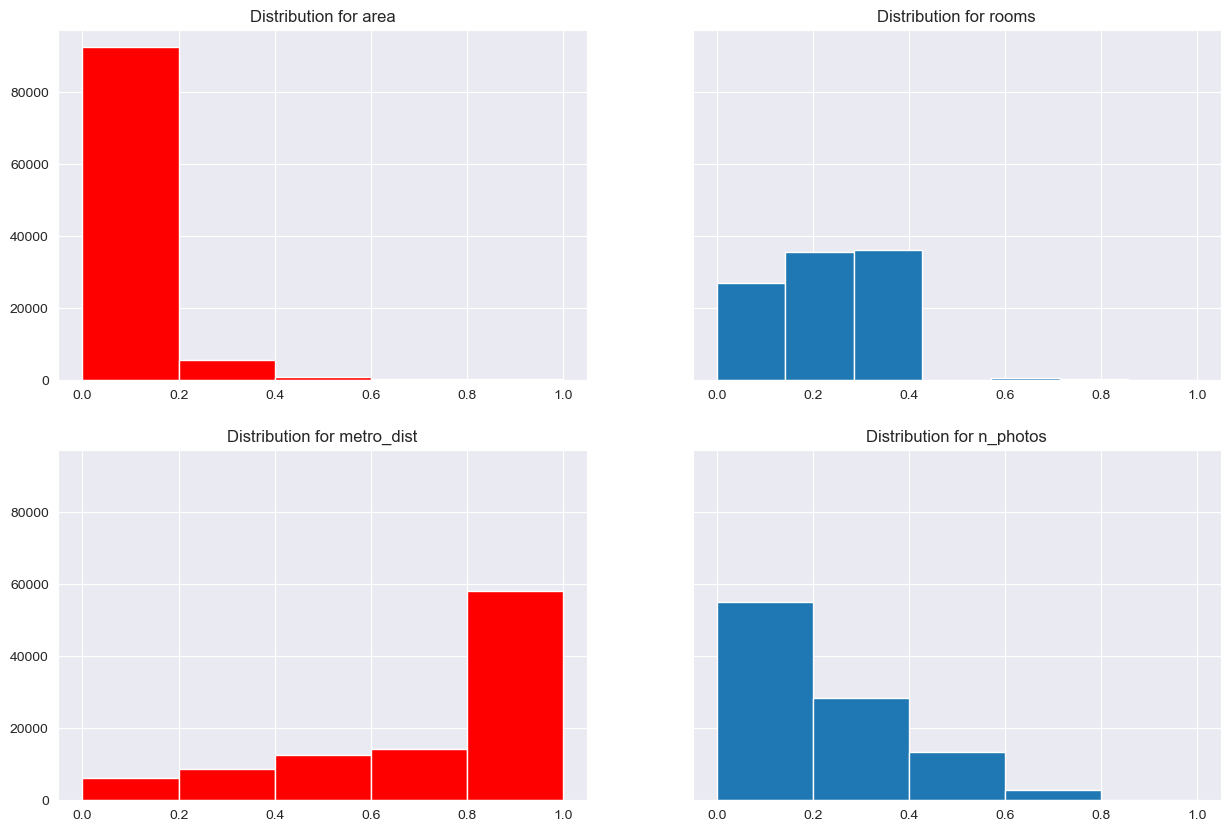

In [49]:
scaled_df.describe()
figure, axs = plt.subplots(2, 2, sharey='all', figsize=(15, 10))

axs[0][1].hist(scaled_df['rooms'], bins=7)
axs[0][1].set_title('Distribution for rooms')

axs[0][0].hist(scaled_df['area'], bins=5, color='red')
axs[0][0].set_title('Distribution for area')

axs[1][1].hist(scaled_df['n_photos'], bins=5)
axs[1][1].set_title('Distribution for n_photos')

axs[1][0].hist(scaled_df['metro_dist'], bins=5, color='red')
axs[1][0].set_title('Distribution for metro_dist')

## Обучим на преобразованных данные baseline модель
##### Вначале без дополнительных столбцов

In [50]:
df_baseline_scaled = scaled_df.copy()

df_baseline_scaled.drop(['id'], axis=1, inplace=True)
df_baseline_scaled

,date,street_id,build_tech,floor,area,rooms,balcon,metro_dist,g_lift,n_photos,...,kw7,kw8,kw9,kw10,kw11,kw12,kw13,price,squared_street_id,squared_date
0,-1.635044,1.162455,0.0,0.041667,0.159574,0.4,0,1.000000,1.0,0.454545,...,0,0,0,0,0,0,0,4510000,1.221672,-1.083435
1,-1.635044,1.713991,0.5,0.375000,0.111702,0.2,1,0.833333,1.0,0.090909,...,0,0,0,0,0,0,0,13231000,2.199159,-1.083435
2,-1.635044,-1.260178,0.0,0.000000,0.101064,0.2,0,0.833333,0.0,0.090909,...,0,0,0,0,0,0,0,2008000,-1.052870,-1.083435
3,-1.635044,-1.239560,0.5,0.083333,0.175532,0.4,1,1.000000,1.0,0.272727,...,0,0,0,0,0,0,0,12680000,-1.047390,-1.083435
4,-1.635044,-0.528233,0.0,0.083333,0.164894,0.4,0,0.833333,1.0,0.272727,...,0,0,0,0,0,0,0,3335000,-0.712440,-1.083435
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,1.646685,0.342884,0.0,0.166667,0.005319,0.0,0,1.000000,0.0,0.090909,...,0,0,0,0,0,0,0,1697000,0.084036,2.093026
99996,1.646685,-1.419969,0.0,0.125000,0.026596,0.0,0,1.000000,0.0,0.090909,...,0,0,0,0,0,0,0,3620000,-1.087260,2.093026
99997,1.646685,-0.419988,0.0,0.083333,0.122340,0.2,0,0.166667,0.0,0.363636,...,0,0,0,0,0,0,0,6712000,-0.636610,2.093026
99998,1.646685,-0.151952,0.5,0.083333,0.808511,0.8,1,0.166667,0.0,0.272727,...,0,0,0,0,0,0,0,20835000,-0.420577,2.093026


In [51]:

# df_baseline_scaled.describe()

train_df_baseline_scaled, test_df_baseline_scaled = train_test_split(df_baseline_scaled, test_size=0.2, random_state=42, shuffle=True)

baseline_model = LinearRegression()
baseline_model.fit(train_df_baseline_scaled.drop(['price', 'squared_street_id', 'squared_date'], axis=1), train_df_baseline_scaled['price'])

LinearRegression()

In [52]:
baseline_preds_scaled = baseline_model.predict(test_df_baseline_scaled.drop(['price', 'squared_street_id', 'squared_date'], axis=1))
baseline_MAE_scaled = mean_absolute_error(test_df_baseline_scaled['price'], baseline_preds_scaled)
baseline_score_scaled = 1.0 / (1. + baseline_MAE_scaled)
baseline_score_scaled

5.463235341447325e-07

#### Скор немного подрос
##### Теперь с дополнительными колонками

In [53]:
baseline_model = LinearRegression()
baseline_model.fit(train_df_baseline_scaled.drop(['price'], axis=1), train_df_baseline_scaled['price'])

LinearRegression()

In [54]:

baseline_preds_scaled = baseline_model.predict(test_df_baseline_scaled.drop(['price'], axis=1))
baseline_MAE_scaled = mean_absolute_error(test_df_baseline_scaled['price'], baseline_preds_scaled)
baseline_score_scaled = 1.0 / (1. + baseline_MAE_scaled)
baseline_score_scaled

5.471194111560151e-07

#### Скор ещё немного вырос
##### Попробуем теперь 2 варианта: без оригинальных столбцов и без малоинформативных столбцов (исходя из корреляции)

In [55]:
baseline_model = LinearRegression()
baseline_model.fit(train_df_baseline_scaled.drop(['price', 'street_id', 'date'], axis=1), train_df_baseline_scaled['price'])

LinearRegression()

In [56]:

baseline_preds_scaled = baseline_model.predict(test_df_baseline_scaled.drop(['price', 'street_id', 'date'], axis=1))
baseline_MAE_scaled = mean_absolute_error(test_df_baseline_scaled['price'], baseline_preds_scaled)
baseline_score_scaled = 1.0 / (1. + baseline_MAE_scaled)
baseline_score_scaled

5.469134502719294e-07

In [57]:
baseline_model = LinearRegression()
baseline_model.fit(train_df_baseline_scaled[['date', 'build_tech', 'floor', 'area', 'rooms', 'balcon', 'metro_dist', 'n_photos']], train_df_baseline_scaled['price'])

LinearRegression()

In [58]:

baseline_preds_scaled = baseline_model.predict(test_df_baseline_scaled[['date', 'build_tech', 'floor', 'area', 'rooms', 'balcon', 'metro_dist', 'n_photos']])
baseline_MAE_scaled = mean_absolute_error(test_df_baseline_scaled['price'], baseline_preds_scaled)
baseline_score_scaled = 1.0 / (1. + baseline_MAE_scaled)
baseline_score_scaled

5.459979632724475e-07

### Попробуем другие модели

##### Случайный лес

In [59]:
trees_regressor = RandomForestRegressor(criterion='absolute_error', n_jobs=-1, random_state=42)
trees_regressor.fit(train_df_baseline_scaled.drop(['price'], axis=1), train_df_baseline_scaled['price'])

RandomForestRegressor(criterion='absolute_error', n_jobs=-1, random_state=42)

In [60]:

trees_regressor_preds = trees_regressor.predict(test_df_baseline_scaled.drop(['price'], axis=1))
trees_regressor_MAE = mean_absolute_error(test_df_baseline_scaled['price'], trees_regressor_preds)
trees_regressor_score = 1.0 / (1. + trees_regressor_MAE)
trees_regressor_score

6.083437811979936e-07

##### Lasso

In [ ]:

# Обучаем модель Lasso
alphas = np.logspace(-2, 8, 20)  # различные значения параметра регуляризации
weights = []
features = train_df_baseline_scaled.drop(['price'], axis=1).columns
for alpha in alphas:
    lasso = Lasso(alpha=alpha)
    lasso.fit(train_df_baseline_scaled.drop(['price'], axis=1), train_df_baseline_scaled['price'])
    weights.append(lasso.coef_)

# Строим график
plt.figure(figsize=(12, 8))
for i in range(len(features)):
    plt.plot(alphas, [weight[i] for weight in weights], label=f'{features[i]}')

plt.xscale('log')
plt.xlabel('Alpha (Log Scale)')
plt.ylabel('Feature Weights')
plt.title('Weights of Features as Alpha Changes')
plt.legend(bbox_to_anchor=(1,0), loc="lower left")
plt.show()

In [ ]:
las = Lasso(alpha=1e3,random_state=42)
las.fit(train_df_baseline_scaled.drop(['price'], axis=1), train_df_baseline_scaled['price'])

In [ ]:
las_regressor_preds = las.predict(test_df_baseline_scaled.drop(['price'], axis=1))

las_regressor_MAE = mean_absolute_error(test_df_baseline_scaled['price'], las_regressor_preds)

las_regressor_score = 1.0 / (1. + las_regressor_MAE)
las_regressor_score

##### ElasticNet

In [ ]:
from sklearn.linear_model import ElasticNet

elas = ElasticNet(alpha=0.1,random_state=42)
elas.fit(train_df_baseline_scaled.drop(['price'], axis=1), train_df_baseline_scaled['price'])

In [ ]:
elas_regressor_preds = elas.predict(test_df_baseline_scaled.drop(['price'], axis=1))

elas_regressor_MAE = mean_absolute_error(test_df_baseline_scaled['price'], elas_regressor_preds)

elas_regressor_score = 1.0 / (1. + elas_regressor_MAE)
elas_regressor_score

##### Lars

In [ ]:
from sklearn.linear_model import Lars

lars = Lars(random_state=42)
lars.fit(train_df_baseline_scaled.drop(['price'], axis=1), train_df_baseline_scaled['price'])

In [ ]:
lars_regressor_preds = lars.predict(test_df_baseline_scaled.drop(['price'], axis=1))

lars_regressor_MAE = mean_absolute_error(test_df_baseline_scaled['price'], lars_regressor_preds)

lars_regressor_score = 1.0 / (1. + lars_regressor_MAE)
lars_regressor_score

##### OrthogonalMatchingPursuit

In [ ]:
from sklearn.linear_model import OrthogonalMatchingPursuit

OMP = OrthogonalMatchingPursuit()
OMP.fit(train_df_baseline_scaled.drop(['price'], axis=1), train_df_baseline_scaled['price'])

In [ ]:
OMP_regressor_preds = OMP.predict(test_df_baseline_scaled.drop(['price'], axis=1))

OMP_regressor_MAE = mean_absolute_error(test_df_baseline_scaled['price'], OMP_regressor_preds)

OMP_regressor_score = 1.0 / (1. + OMP_regressor_MAE)
OMP_regressor_score

##### SGDRegressor

In [ ]:

from sklearn.linear_model import SGDRegressor

SGD = SGDRegressor(random_state=42)
SGD.fit(train_df_baseline_scaled.drop(['price'], axis=1), train_df_baseline_scaled['price'])

In [ ]:
SGD_regressor_preds = SGD.predict(test_df_baseline_scaled.drop(['price'], axis=1))

SGD_regressor_MAE = mean_absolute_error(test_df_baseline_scaled['price'], SGD_regressor_preds)

SGD_regressor_score = 1.0 / (1. + SGD_regressor_MAE)
SGD_regressor_score

##### Polynomial

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

poly = Pipeline([('poly', PolynomialFeatures(degree=2)), 
                  ('linear', LinearRegression(fit_intercept=False))])
poly.fit(train_df_baseline_scaled.drop(['price'], axis=1), train_df_baseline_scaled['price'])


In [ ]:
poly_regressor_preds = poly.predict(test_df_baseline_scaled.drop(['price'], axis=1))

poly_regressor_MAE = mean_absolute_error(test_df_baseline_scaled['price'], poly_regressor_preds)

poly_regressor_score = 1.0 / (1. + poly_regressor_MAE)
poly_regressor_score

##### BayesianRidge

In [ ]:
from sklearn.linear_model import BayesianRidge

bay = BayesianRidge(tol=1e-6)
bay.fit(train_df_baseline_scaled.drop(['price'], axis=1), train_df_baseline_scaled['price'])

In [ ]:
bay_regressor_preds = bay.predict(test_df_baseline_scaled.drop(['price'], axis=1))

bay_regressor_MAE = mean_absolute_error(test_df_baseline_scaled['price'], bay_regressor_preds)

bay_regressor_score = 1.0 / (1. + bay_regressor_MAE)
bay_regressor_score

##### GradientBoostingClassifier

In [60]:
from sklearn.ensemble import GradientBoostingClassifier

SGB = GradientBoostingClassifier(n_estimators=1, random_state=42, verbose=1)
SGB.fit(train_df_baseline_scaled.drop(['price'], axis=1), train_df_baseline_scaled['price'])

      Iter       Train Loss   Remaining Time 


KeyboardInterrupt: 

In [ ]:
SGB_regressor_preds = SGB.predict(test_df_baseline_scaled.drop(['price'], axis=1))

SGB_regressor_MAE = mean_absolute_error(test_df_baseline_scaled['price'], SGB_regressor_preds)

SGB_regressor_score = 1.0 / (1. + SGB_regressor_MAE)
SGB_regressor_score

##### LinearRegression() -> RandomForest()

In [67]:
baseline_model = LinearRegression()
baseline_model.fit(train_df_baseline_scaled.drop(['price'], axis=1), train_df_baseline_scaled['price'])

LinearRegression()

In [68]:

baseline_preds_scaled = baseline_model.predict(test_df_baseline_scaled.drop(['price'], axis=1))
baseline_MAE_scaled = mean_absolute_error(test_df_baseline_scaled['price'], baseline_preds_scaled)
baseline_score_scaled = 1.0 / (1. + baseline_MAE_scaled)
baseline_score_scaled

5.471194111560151e-07

In [78]:
simple_preds = pd.DataFrame(baseline_model.predict(train_df_baseline_scaled.drop(['price'], axis=1)))

stack_df = pd.concat([train_df_baseline_scaled, simple_preds], axis=1)

In [75]:
trees_regressor = RandomForestRegressor(criterion='absolute_error', n_jobs=-1, random_state=42)
trees_regressor.fit(stack_df, train_df_baseline_scaled['price'])

RandomForestRegressor(criterion='absolute_error', n_jobs=-1, random_state=42)

In [77]:

trees_regressor_preds = trees_regressor.predict(test_df_baseline_scaled.drop(['price'], axis=1))
trees_regressor_MAE = mean_absolute_error(test_df_baseline_scaled['price'], trees_regressor_preds)
trees_regressor_score = 1.0 / (1. + trees_regressor_MAE)
trees_regressor_score

4.5427979409651126e-07

### Попробую подобрать гиперпараметры случайного леса

In [59]:
trees_regressor = RandomForestRegressor(criterion='absolute_error', n_jobs=-1, random_state=42)
# trees_regressor.fit(train_df_baseline_scaled.drop(['price'], axis=1), train_df_baseline_scaled['price'])

In [ ]:
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1000, num = 10)]
max_features = ['log2', 'sqrt']
max_depth = [int(x) for x in np.linspace(start = 1, stop = 15, num = 15)]
min_samples_split = [int(x) for x in np.linspace(start = 2, stop = 50, num = 10)]
min_samples_leaf = [int(x) for x in np.linspace(start = 2, stop = 50, num = 10)]
bootstrap = [True, False]
param_dist = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
rs = RandomizedSearchCV(trees_regressor, 
                        param_dist, 
                        n_iter = 100, 
                        cv = 3, 
                        verbose = 1, 
                        n_jobs=-1, 
                        random_state=0)
rs.fit(train_df_baseline_scaled.drop(['price'], axis=1), train_df_baseline_scaled['price'])
rs.best_params_

Fitting 3 folds for each of 100 candidates, totalling 300 fits


In [ ]:

trees_regressor_preds = trees_regressor.predict(test_df_baseline_scaled.drop(['price'], axis=1))
trees_regressor_MAE = mean_absolute_error(test_df_baseline_scaled['price'], trees_regressor_preds)
trees_regressor_score = 1.0 / (1. + trees_regressor_MAE)
trees_regressor_score

In [59]:
trees_regressor = RandomForestRegressor(n_estimators=5, criterion='absolute_error', n_jobs=-1, random_state=42)
# trees_regressor.fit(train_df_baseline_scaled.drop(['price'], axis=1), train_df_baseline_scaled['price'])

In [60]:
# n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1000, num = 10)]
max_features = ['log2', 'sqrt']
max_depth = [int(x) for x in np.linspace(start = 1, stop = 15, num = 15)]
min_samples_split = [int(x) for x in np.linspace(start = 2, stop = 50, num = 10)]
min_samples_leaf = [int(x) for x in np.linspace(start = 2, stop = 50, num = 10)]
bootstrap = [True, False]
param_dist = {'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
rs = RandomizedSearchCV(trees_regressor, 
                        param_dist, 
                        n_iter = 100, 
                        cv = 3, 
                        verbose = 1, 
                        n_jobs=-1, 
                        random_state=0)
rs.fit(train_df_baseline_scaled.drop(['price'], axis=1), train_df_baseline_scaled['price'])
rs.best_params_

Fitting 3 folds for each of 100 candidates, totalling 300 fits


{'min_samples_split': 34,
 'min_samples_leaf': 7,
 'max_features': 'sqrt',
 'max_depth': 15,
 'bootstrap': False}

In [61]:
trees_regressor = RandomForestRegressor(n_estimators=10, criterion='absolute_error', n_jobs=-1, random_state=42)
# trees_regressor.fit(train_df_baseline_scaled.drop(['price'], axis=1), train_df_baseline_scaled['price'])

In [62]:
# n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1000, num = 10)]
max_features = ['log2', 'sqrt']
max_depth = [int(x) for x in np.linspace(start = 1, stop = 15, num = 15)]
min_samples_split = [int(x) for x in np.linspace(start = 2, stop = 50, num = 10)]
min_samples_leaf = [int(x) for x in np.linspace(start = 2, stop = 50, num = 10)]
bootstrap = [True, False]
param_dist = {'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
rs = RandomizedSearchCV(trees_regressor, 
                        param_dist, 
                        n_iter = 100, 
                        cv = 3, 
                        verbose = 1, 
                        n_jobs=-1, 
                        random_state=0)
rs.fit(train_df_baseline_scaled.drop(['price'], axis=1), train_df_baseline_scaled['price'])
rs.best_params_

Fitting 3 folds for each of 100 candidates, totalling 300 fits


{'min_samples_split': 34,
 'min_samples_leaf': 7,
 'max_features': 'sqrt',
 'max_depth': 15,
 'bootstrap': False}

In [63]:
trees_regressor = RandomForestRegressor(n_estimators=15, criterion='absolute_error', n_jobs=-1, random_state=42)
# trees_regressor.fit(train_df_baseline_scaled.drop(['price'], axis=1), train_df_baseline_scaled['price'])

In [64]:
# n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1000, num = 10)]
max_features = ['log2', 'sqrt']
max_depth = [int(x) for x in np.linspace(start = 1, stop = 15, num = 15)]
min_samples_split = [int(x) for x in np.linspace(start = 2, stop = 50, num = 10)]
min_samples_leaf = [int(x) for x in np.linspace(start = 2, stop = 50, num = 10)]
bootstrap = [True, False]
param_dist = {'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
rs = RandomizedSearchCV(trees_regressor, 
                        param_dist, 
                        n_iter = 100, 
                        cv = 3, 
                        verbose = 1, 
                        n_jobs=-1, 
                        random_state=0)
rs.fit(train_df_baseline_scaled.drop(['price'], axis=1), train_df_baseline_scaled['price'])
rs.best_params_

Fitting 3 folds for each of 100 candidates, totalling 300 fits


{'min_samples_split': 23,
 'min_samples_leaf': 7,
 'max_features': 'sqrt',
 'max_depth': 15,
 'bootstrap': False}

In [65]:
trees_regressor = RandomForestRegressor(n_estimators=20, criterion='absolute_error', n_jobs=-1, random_state=42)
# trees_regressor.fit(train_df_baseline_scaled.drop(['price'], axis=1), train_df_baseline_scaled['price'])

In [66]:
# n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1000, num = 10)]
max_features = ['log2', 'sqrt']
max_depth = [int(x) for x in np.linspace(start = 1, stop = 15, num = 15)]
min_samples_split = [int(x) for x in np.linspace(start = 2, stop = 50, num = 10)]
min_samples_leaf = [int(x) for x in np.linspace(start = 2, stop = 50, num = 10)]
bootstrap = [True, False]
param_dist = {'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
rs = RandomizedSearchCV(trees_regressor, 
                        param_dist, 
                        n_iter = 100, 
                        cv = 3, 
                        verbose = 1, 
                        n_jobs=-1, 
                        random_state=0)
rs.fit(train_df_baseline_scaled.drop(['price'], axis=1), train_df_baseline_scaled['price'])
rs.best_params_

Fitting 3 folds for each of 100 candidates, totalling 300 fits


{'min_samples_split': 23,
 'min_samples_leaf': 7,
 'max_features': 'sqrt',
 'max_depth': 15,
 'bootstrap': False}

In [68]:
rs.best_estimator_

RandomForestRegressor(bootstrap=False, criterion='absolute_error', max_depth=15,
                      max_features='sqrt', min_samples_leaf=7,
                      min_samples_split=23, n_estimators=20, n_jobs=-1,
                      random_state=42)

In [71]:
trees_regressor = RandomForestRegressor(bootstrap=False, criterion='absolute_error', max_depth=15,
                                        max_features='sqrt', min_samples_leaf=7,
                                        min_samples_split=23, n_estimators=100, n_jobs=-1,
                                        random_state=42)
trees_regressor.fit(train_df_baseline_scaled.drop(['price'], axis=1), train_df_baseline_scaled['price'])

RandomForestRegressor(bootstrap=False, criterion='absolute_error', max_depth=15,
                      max_features='sqrt', min_samples_leaf=7,
                      min_samples_split=23, n_jobs=-1, random_state=42)

In [72]:

trees_regressor_preds = trees_regressor.predict(test_df_baseline_scaled.drop(['price'], axis=1))
trees_regressor_MAE = mean_absolute_error(test_df_baseline_scaled['price'], trees_regressor_preds)
trees_regressor_score = 1.0 / (1. + trees_regressor_MAE)
trees_regressor_score

5.902385158136388e-07

### Не вышло, занимает слишком много времени. Попробую снизить размерность данных

In [77]:
from sklearn.decomposition import PCA
# import plotly.express as px


prepared_data_train = train_df_baseline_scaled.drop(['price'], axis=1)
prepared_data_test = test_df_baseline_scaled.drop(['price'], axis=1)
pca = PCA(n_components=10)
components_10_train = pca.fit_transform(prepared_data_train)
components_10_test = pca.fit_transform(prepared_data_test)

# # Создание интерактивного 3D графика
# fig = px.scatter_3d(components_10_train, x=0, y=1, z=2)
# fig.show()

In [78]:
components_10_train[:5]

array([[-1.73891483,  0.98383412,  1.91020489, -0.18556538,  0.35424551,
         0.092011  , -0.04475218,  0.19539   , -0.06893144,  0.12157233],
       [ 1.41597818, -0.22390109, -0.17194992, -0.91477929,  0.06462008,
         0.07783367, -0.03683007,  0.29417748, -0.2016895 , -0.02913907],
       [-1.59944865, -0.49513253, -0.35359884, -0.192311  , -0.62191281,
        -0.27817325,  0.93730565,  0.03649444, -0.20072759,  0.14649355],
       [ 2.60017466, -1.37363223,  0.54617632,  0.11891616,  0.86920615,
        -0.23537538, -0.04600787, -0.01646228,  0.15859936,  0.23300613],
       [-1.31011197,  2.1209284 , -0.19649452, -0.92831561,  0.05424498,
         0.08075659, -0.0823966 , -0.17980095,  0.1889518 , -0.07328159]])

### Опробуем обычный случайный лес

In [82]:
%%time
trees_regressor = RandomForestRegressor(n_estimators=1000, criterion='absolute_error', n_jobs=-1, random_state=42)
trees_regressor.fit(components_10_train, train_df_baseline_scaled['price'])

CPU times: total: 1d 23h 25min 36s
Wall time: 2h 7min 48s


RandomForestRegressor(criterion='absolute_error', n_estimators=1000, n_jobs=-1,
                      random_state=42)

In [83]:

trees_regressor_preds = trees_regressor.predict(components_10_test)
trees_regressor_MAE = mean_absolute_error(test_df_baseline_scaled['price'], trees_regressor_preds)
trees_regressor_score = 1.0 / (1. + trees_regressor_MAE)
trees_regressor_score

4.152835671342067e-07

### Попробую обрезать "хвост" распределения целевой переменной у тренировочных данных

In [73]:
train_df_baseline_scaled[train_df_baseline_scaled['price'] <= 1e7]

,date,street_id,build_tech,floor,area,rooms,balcon,metro_dist,g_lift,n_photos,...,kw7,kw8,kw9,kw10,kw11,kw12,kw13,price,squared_street_id,squared_date
48955,-0.090701,1.007819,0.0,0.333333,0.170213,0.4,0,0.666667,1.0,0.454545,...,0,0,0,0,0,0,0,6052000,0.978210,-0.379997
44966,-0.090701,-1.249869,0.0,0.250000,0.154255,0.2,0,1.000000,1.0,0.363636,...,0,0,0,0,0,0,0,3855000,-1.050160,-0.379997
13568,-1.248959,1.559355,0.5,0.083333,0.127660,0.2,1,1.000000,0.0,0.272727,...,0,0,0,0,0,0,0,2801000,1.907898,-1.039470
92727,1.453642,-0.718951,0.0,0.083333,0.063830,0.2,0,0.666667,1.0,0.000000,...,0,0,0,0,0,0,0,5655000,-0.830069,1.730316
51349,0.102342,-1.610687,0.0,0.166667,0.090426,0.2,0,0.833333,1.0,0.636364,...,0,0,0,0,0,0,0,1000000,-1.109573,-0.193146
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6265,-1.442001,-0.389061,0.5,0.166667,0.164894,0.4,1,1.000000,0.0,0.636364,...,0,0,0,0,0,0,0,5023000,-0.613738,-1.072443
54886,0.102342,-0.265352,0.5,0.375000,0.164894,0.4,1,0.666667,1.0,0.363636,...,0,0,0,0,0,0,0,5636000,-0.516889,-0.193146
76820,0.874513,-1.631305,0.5,0.041667,0.164894,0.4,1,1.000000,1.0,0.272727,...,0,0,0,0,0,0,0,2957000,-1.110764,0.774080
860,-1.635044,-0.265352,0.5,0.000000,0.164894,0.4,0,0.833333,1.0,0.000000,...,0,0,0,0,0,0,0,4913000,-0.516889,-1.083435


In [75]:
trees_regressor = RandomForestRegressor(bootstrap=False, criterion='absolute_error', max_depth=15,
                                        max_features='sqrt', min_samples_leaf=7,
                                        min_samples_split=23, n_estimators=100, n_jobs=-1,
                                        random_state=42)
trees_regressor.fit(train_df_baseline_scaled[train_df_baseline_scaled['price'] <= 1e7].drop(['price'], axis=1), train_df_baseline_scaled[train_df_baseline_scaled['price'] <= 1e7]['price'])

RandomForestRegressor(bootstrap=False, criterion='absolute_error', max_depth=15,
                      max_features='sqrt', min_samples_leaf=7,
                      min_samples_split=23, n_jobs=-1, random_state=42)

In [76]:

trees_regressor_preds = trees_regressor.predict(test_df_baseline_scaled.drop(['price'], axis=1))
trees_regressor_MAE = mean_absolute_error(test_df_baseline_scaled['price'], trees_regressor_preds)
trees_regressor_score = 1.0 / (1. + trees_regressor_MAE)
trees_regressor_score

5.179667997838796e-07

In [82]:
baseline_model = LinearRegression()
baseline_model.fit(train_df_baseline_scaled[train_df_baseline_scaled['price'] <= 1e7].drop(['price'], axis=1), train_df_baseline_scaled[train_df_baseline_scaled['price'] <= 1e7]['price'])

LinearRegression()

In [83]:

baseline_preds_scaled = baseline_model.predict(test_df_baseline_scaled.drop(['price'], axis=1))
baseline_MAE_scaled = mean_absolute_error(test_df_baseline_scaled['price'], baseline_preds_scaled)
baseline_score_scaled = 1.0 / (1. + baseline_MAE_scaled)
baseline_score_scaled

5.097690036161651e-07

### Попытаемся с исходным ненормированным датасетом

In [ ]:
baseline_model = LinearRegression()
baseline_model.fit(train_df_baseline.drop(['price'], axis=1), train_df_baseline['price'])
baseline_preds = baseline_model.predict(test_df_baseline.drop(['price'], axis=1))
baseline_MAE = mean_absolute_error(test_df_baseline['price'], baseline_preds)
baseline_score = 1.0 / (1. + baseline_MAE)
baseline_score

In [84]:
trees_regressor = RandomForestRegressor(bootstrap=False, criterion='absolute_error', max_depth=15,
                                        max_features='sqrt', min_samples_leaf=7,
                                        min_samples_split=23, n_estimators=100, n_jobs=-1,
                                        random_state=42)
trees_regressor.fit(train_df_baseline.drop(['price'], axis=1), train_df_baseline['price'])

RandomForestRegressor(bootstrap=False, criterion='absolute_error', max_depth=15,
                      max_features='sqrt', min_samples_leaf=7,
                      min_samples_split=23, n_jobs=-1, random_state=42)

In [85]:

trees_regressor_preds = trees_regressor.predict(test_df_baseline.drop(['price'], axis=1))
trees_regressor_MAE = mean_absolute_error(test_df_baseline['price'], trees_regressor_preds)
trees_regressor_score = 1.0 / (1. + trees_regressor_MAE)
trees_regressor_score

5.753031048626178e-07

### Добавим ещё несколько фичей

In [ ]:
# squared_street = pd.DataFrame(df_filled_metro_dist['street_id'] ** 2)
# squared_street.rename(columns={'street_id': 'squared_street_id'}, inplace=True)
# squared_date = pd.DataFrame(df_filled_metro_dist['date'] ** 2)
# squared_date.rename(columns={'date': 'squared_date'}, inplace=True)
# 
# # squared_date. = ['squared_date']
# 
# sqr_df = pd.concat([df_filled_metro_dist, squared_street, squared_date], axis=1)
# sqr_df

In [116]:
squared_rooms = pd.DataFrame(sqr_df['rooms'] ** 2)
squared_rooms.rename(columns={'rooms': 'squared_rooms'}, inplace=True)
squared_photos = pd.DataFrame(sqr_df['n_photos'] ** 2)
squared_photos.rename(columns={'n_photos': 'squared_n_photos'}, inplace=True)

exstra_features_4 = pd.concat([sqr_df, squared_rooms, squared_photos], axis=1)

train_exstra_features_4, test_exstra_features_4 = train_test_split(exstra_features_4.drop(['id'], axis=1), test_size=0.05, random_state=42, shuffle=True)


In [94]:
trees_regressor = RandomForestRegressor(bootstrap=False, criterion='absolute_error', max_depth=15,
                                        max_features='sqrt', min_samples_leaf=7,
                                        min_samples_split=23, n_estimators=100, n_jobs=-1,
                                        random_state=42)
trees_regressor.fit(train_exstra_features_4.drop(['price'], axis=1), train_exstra_features_4['price'])

RandomForestRegressor(bootstrap=False, criterion='absolute_error', max_depth=15,
                      max_features='sqrt', min_samples_leaf=7,
                      min_samples_split=5, n_jobs=-1, random_state=42)

In [95]:

trees_regressor_preds = trees_regressor.predict(test_exstra_features_4.drop(['price'], axis=1))
trees_regressor_MAE = mean_absolute_error(test_exstra_features_4['price'], trees_regressor_preds)
trees_regressor_score = 1.0 / (1. + trees_regressor_MAE)
trees_regressor_score

5.904101191079913e-07

In [120]:
trees_regressor = RandomForestRegressor(bootstrap=False, criterion='absolute_error', max_depth=15,
                                        max_features='sqrt', min_samples_leaf=7,
                                        min_samples_split=5, n_estimators=100, n_jobs=-1,
                                        random_state=42)
trees_regressor.fit(train_exstra_features_4.drop(['price'], axis=1), train_exstra_features_4['price'])

RandomForestRegressor(bootstrap=False, criterion='absolute_error', max_depth=15,
                      max_features='sqrt', min_samples_leaf=7,
                      min_samples_split=5, n_jobs=-1, random_state=42)

In [121]:

trees_regressor_preds = trees_regressor.predict(test_exstra_features_4.drop(['price'], axis=1))
trees_regressor_MAE = mean_absolute_error(test_exstra_features_4['price'], trees_regressor_preds)
trees_regressor_score = 1.0 / (1. + trees_regressor_MAE)
trees_regressor_score

5.701882094119198e-07

In [122]:
trees_regressor_preds = trees_regressor.predict(train_exstra_features_4.drop(['price'], axis=1))
trees_regressor_MAE = mean_absolute_error(train_exstra_features_4['price'], trees_regressor_preds)
trees_regressor_score = 1.0 / (1. + trees_regressor_MAE)
trees_regressor_score

6.472253708841376e-07


### Предобработка тестовых данных

In [61]:
data_dict = dict()
for i, data in enumerate(sorted(raw_test_data['date'].unique())):
    data_dict[data] = i

test_date_numeric_df = pd.DataFrame([data_dict[x] for x in raw_test_data['date']], columns=['date_numeric'])

# test_control_df = raw_test_data.copy()
# test_control_df['date'] = test_date_numeric_df['date_numeric']


# предположим, что df - это ваш датафрейм
df = raw_test_data.copy()
df['date'] = test_date_numeric_df['date_numeric']

# разделяем датафрейм на две части: где 'g_lift' не равно NaN и где 'g_lift' равно NaN
df_notna = df[df['g_lift'].notna()]
df_na = df[df['g_lift'].isna()]

# определяем признаки и целевую переменную, исключая столбцы 'id', 'build_tech', 'metro_dist' и 'g_lift'
X = df_notna.drop(columns=['id', 'build_tech', 'metro_dist', 'g_lift'])
y = df_notna['g_lift']

# стандартизируем данные
scaler = StandardScaler()
X = scaler.fit_transform(X)

# обучаем модель
model = LogisticRegression()
model.fit(X, y)

# заполняем пропущенные значения в 'g_lift', исключая столбцы 'id', 'build_tech', 'metro_dist' и 'g_lift'
df_na.loc[:, 'g_lift'] = model.predict(scaler.transform(df_na.drop(columns=['id', 'build_tech', 'metro_dist', 'g_lift'])))

# объединяем два датафрейма обратно
df_filled_g_lift = pd.concat([df_notna, df_na])

# сортируем итоговый датафрейм по столбцу 'id'
df_filled_g_lift = df_filled_g_lift.sort_values(by='id')

# проверяем, что пропущенных значений нет
assert df_filled_g_lift['g_lift'].isna().sum() == 0

In [62]:
df = df_filled_g_lift
# разделяем датафрейм на две части: где 'g_lift' не равно NaN и где 'g_lift' равно NaN
df_notna = df[df['build_tech'].notna()]
df_na = df[df['build_tech'].isna()]

# определяем признаки и целевую переменную, исключая столбцы 'id', 'build_tech', 'metro_dist' и 'g_lift'
X = df_notna.drop(columns=['id', 'build_tech', 'metro_dist'])
y = df_notna['build_tech']

# стандартизируем данные
scaler = StandardScaler()
X = scaler.fit_transform(X)

# обучаем модель
model = LogisticRegression()
model.fit(X, y)

# заполняем пропущенные значения в 'g_lift', исключая столбцы 'id', 'build_tech', 'metro_dist' и 'g_lift'
df_na.loc[:, 'build_tech'] = model.predict(scaler.transform(df_na.drop(columns=['id', 'build_tech', 'metro_dist'])))

# объединяем два датафрейма обратно
df_filled_build_tech = pd.concat([df_notna, df_na])

# сортируем итоговый датафрейм по столбцу 'id'
df_filled_build_tech = df_filled_build_tech.sort_values(by='id')

# проверяем, что пропущенных значений нет
assert df_filled_build_tech['build_tech'].isna().sum() == 0

In [63]:
df = df_filled_build_tech
# разделяем датафрейм на две части: где 'g_lift' не равно NaN и где 'g_lift' равно NaN
df_notna = df[df['metro_dist'].notna()]
df_na = df[df['metro_dist'].isna()]

# определяем признаки и целевую переменную, исключая столбцы 'id', 'build_tech', 'metro_dist' и 'g_lift'
X = df_notna.drop(columns=['id', 'metro_dist'])
y = df_notna['metro_dist']

# стандартизируем данные
scaler = StandardScaler()
X = scaler.fit_transform(X)

# обучаем модель
model = LogisticRegression()
model.fit(X, y)

# заполняем пропущенные значения в 'g_lift', исключая столбцы 'id', 'build_tech', 'metro_dist' и 'g_lift'
df_na.loc[:, 'metro_dist'] = model.predict(scaler.transform(df_na.drop(columns=['id', 'metro_dist'])))

# объединяем два датафрейма обратно
df_filled_metro_dist = pd.concat([df_notna, df_na])

# сортируем итоговый датафрейм по столбцу 'id'
df_filled_metro_dist = df_filled_metro_dist.sort_values(by='id')

# проверяем, что пропущенных значений нет
assert df_filled_metro_dist['metro_dist'].isna().sum() == 0

In [64]:
squared_street = pd.DataFrame(df_filled_metro_dist['street_id']**2)
squared_street.rename(columns={'street_id': 'squared_street_id'}, inplace=True)
squared_date = pd.DataFrame(df_filled_metro_dist['date']**2)
squared_date.rename(columns={'date': 'squared_date'}, inplace=True)

# squared_date. = ['squared_date']

sqr_df = pd.concat([df_filled_metro_dist, squared_street, squared_date], axis=1)
df_filled_metro_dist

,id,date,street_id,build_tech,floor,area,rooms,balcon,metro_dist,g_lift,...,kw4,kw5,kw6,kw7,kw8,kw9,kw10,kw11,kw12,kw13
0,100000,0,459,1.0,1,60,3,1,30.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1,100001,0,344,1.0,10,52,2,1,30.0,1.0,...,0,0,0,0,0,0,0,0,0,0
2,100002,0,585,0.0,4,54,3,0,30.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3,100003,0,494,1.0,2,52,2,1,25.0,1.0,...,0,0,0,0,0,0,0,0,0,0
4,100004,0,622,1.0,9,60,3,1,15.0,0.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,199995,18,613,1.0,2,34,1,1,25.0,1.0,...,0,0,0,0,0,0,0,0,0,0
99996,199996,18,167,1.0,10,61,3,1,30.0,1.0,...,0,0,0,0,0,0,0,0,0,0
99997,199997,18,391,1.0,9,34,1,1,30.0,1.0,...,0,0,0,0,0,0,0,0,0,0
99998,199998,18,21,0.0,7,58,3,0,30.0,0.0,...,0,0,0,0,0,0,0,0,0,0


In [65]:
st_scaler = StandardScaler()
min_max_scaler = MinMaxScaler()
scaled_df = sqr_df.copy()
scaled_df[['date', 'street_id', 'squared_street_id', 'squared_date']] = st_scaler.fit_transform(scaled_df[['date', 'street_id', 'squared_street_id', 'squared_date']])
scaled_df[['rooms','floor', 'area', 'n_photos', 'metro_dist', 'build_tech']] = min_max_scaler.fit_transform(scaled_df[['rooms','floor', 'area', 'n_photos', 'metro_dist', 'build_tech']])

scaled_df.describe()

,id,date,street_id,build_tech,floor,area,rooms,balcon,metro_dist,g_lift,...,kw6,kw7,kw8,kw9,kw10,kw11,kw12,kw13,squared_street_id,squared_date
count,100000.000000,1.000000e+05,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,...,100000.000000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,1.000000e+05,1.000000e+05
mean,149999.500000,4.547474e-17,1.261213e-16,0.250900,0.177242,0.123823,0.223338,0.397860,0.749548,0.503710,...,0.001860,0.000770,0.00813,0.007800,0.001630,0.000190,0.001460,0.000190,-6.750156e-18,-7.275958e-17
std,28867.657797,1.000005e+00,1.000005e+00,0.284297,0.162530,0.095248,0.165959,0.548662,0.275723,0.499989,...,0.043088,0.027738,0.08980,0.087973,0.040341,0.013783,0.038182,0.013783,1.000005e+00,1.000005e+00
min,100000.000000,-1.818716e+00,-1.727067e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.114841e+00,-1.147816e+00
25%,124999.750000,-8.567868e-01,-8.706489e-01,0.000000,0.041667,0.058511,0.000000,0.000000,0.500000,0.000000,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,-9.095360e-01,-9.012626e-01
50%,149999.500000,-8.724316e-02,-3.912849e-03,0.000000,0.125000,0.122340,0.200000,0.000000,0.833333,1.000000,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,-2.836958e-01,-3.489839e-01
75%,174999.250000,8.746864e-01,8.628232e-01,0.500000,0.250000,0.164894,0.400000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,7.627090e-01,7.851598e-01
max,199999.000000,1.644230e+00,1.734718e+00,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,...,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,2.239670e+00,2.047511e+00


In [ ]:
# train_df_baseline_scaled = scaled_df.copy()

In [68]:
trees_regressor_preds_control = trees_regressor.predict(scaled_df.drop(['id'], axis=1))
# trees_regressor_MAE = mean_absolute_error(test_df_baseline_scaled['price'], trees_regressor_preds)
# trees_regressor_score = 1.0 / (1. + trees_regressor_MAE)
# trees_regressor_score

In [72]:
trees_regressor_preds_control.shape

(100000,)

In [74]:
submission = pd.concat([scaled_df['id'], pd.DataFrame(trees_regressor_preds_control, columns=['price'])], axis=1)

In [75]:
submission

,id,price
0,100000,4333410.0
1,100001,4208260.0
2,100002,2363135.0
3,100003,3852820.0
4,100004,6115460.0
...,...,...
99995,199995,3928980.0
99996,199996,5704650.0
99997,199997,4064210.0
99998,199998,4084745.0


In [76]:
submission.to_csv('my_submission.csv', index=False)